<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-and-lightly-shape-source-data" data-toc-modified-id="Get-and-lightly-shape-source-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Get and lightly shape source data</a></span></li><li><span><a href="#self-term" data-toc-modified-id="self-term-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>self-term</a></span></li><li><span><a href="#Contextual-word-categories" data-toc-modified-id="Contextual-word-categories-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Contextual word categories</a></span></li><li><span><a href="#Labels" data-toc-modified-id="Labels-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Labels</a></span><ul class="toc-item"><li><span><a href="#Labels-word-clouds" data-toc-modified-id="Labels-word-clouds-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Labels word clouds</a></span></li></ul></li><li><span><a href="#background-characteristics" data-toc-modified-id="background-characteristics-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>background characteristics</a></span><ul class="toc-item"><li><span><a href="#Messy-Categories" data-toc-modified-id="Messy-Categories-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>Messy Categories</a></span></li></ul></li></ul></li><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sentiment analysis</a></span></li><li><span><a href="#Scrap" data-toc-modified-id="Scrap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scrap</a></span><ul class="toc-item"><li><span><a href="#Some-stats" data-toc-modified-id="Some-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some stats</a></span></li></ul></li></ul></div>

In [1]:

# frequently used builtins
import os
from collections import Counter, defaultdict

# frequently used data pkgs
import numpy as np
import pandas as pd
			
# careful import of matplotlib
try:
	import matplotlib.pyplot as plt
except ModuleNotFoundError as e:  # to catch ModuleNotFoundError: No module named '_tkinter'
	import matplotlib
	matplotlib.use('agg')
	import matplotlib.pyplot as plt

# some magic stuff
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [128]:
from importlib_resources import files

likert_files = files('likert')
itow_data_files = likert_files / 'examples' / 'in_their_own_words' / 'data'
# itow_survey = itow_data_files / 'in_their_own_words_survey_2021_11.xlsx'
itow_survey = itow_data_files / 'in_their_own_words_survey_2022_01.xlsx'

def word_cloud(words, save_filepath=None, width=2538, height=2538, **kwargs):
    from wordcloud import WordCloud
    from typing import Mapping
    from collections import Counter
    
    if isinstance(words, (list, tuple)):
        weight_for_word = Counter(words)
    else:
        weight_for_word = words
    wc = WordCloud(width=width, height=height, **kwargs)
    wc.fit_words(weight_for_word)
    if save_filepath is not None:
        wc.to_file(save_filepath)
    return wc

import re

def extract_end_of_large_question(x, pattern=re.compile('(?<=-\ )[\-\w\ ]+$')):
    m = pattern.search(x)
    if m is not None:
        return m.group(0)
    else:
        return x
    
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('en-sentiment')

def _sentiment_score_object(string):
    sentence = Sentence(string)
    sia.predict(sentence)
    return sentence.labels[0]

def sentiment_score(string):
    score = _sentiment_score_object(string)
    if score.value == 'NEGATIVE':
        return -score.score
    elif score.value == 'POSITIVE':
        return score.score
    else:
        raise ValueError(f"Didn't know score.value could be {score.value}")
    
    
convert_to_percentage = lambda x, n=1: round(x * 100, n)

2022-02-27 15:01:13,915 loading file /Users/Thor.Whalen/.flair/models/sentiment-en-mix-distillbert_4.pt


ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

## Get and lightly shape source data

In [38]:
import pandas as pd
from graze import graze
import io

# src = 'https://www.dropbox.com/s/ycdauvy63t51tgo/Wishes%20Survey%20Boeri_NOV21%2C%202021.xlsx?dl=0'
# data = pd.read_excel(io.BytesIO(graze(src)), header=0)

data = pd.read_excel(itow_survey, header=0)
orig_shape = data.shape
orig_shape

(207, 36)

In [39]:
data.columns

Index(['SID', 'Q1', 'Q14', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q3_1',
       'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q3_9', 'Q3_10',
       'Q3_11', 'Q3_12', 'Q3_13', 'Q3_13_TEXT', 'Q4', 'Q5', 'Q5_3_TEXT', 'Q6',
       'Q6_6_TEXT', 'Q7', 'Q8', 'Education Number', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q15', 'Education Number.1'],
      dtype='object')

In [40]:
if data.shape == orig_shape:
    questions = data.iloc[0]
    data.drop(axis=0, index=0, inplace=True)
data.shape

(206, 36)

In [41]:
questions

SID                                                                  ID
Q1                    1. What term or label do\nyou use to identify ...
Q14                                                  Self-term category
Q2_1                  2. Do you use the same label or another when\n...
Q2_2                  2. Do you use the same label or another when\n...
Q2_3                  2. Do you use the same label or another when\n...
Q2_4                  2. Do you use the same label or another when\n...
Q2_5                  2. Do you use the same label or another when\n...
Q3_1                  3. If\nyou could choose how other people refer...
Q3_2                  3. If\nyou could choose how other people refer...
Q3_3                  3. If\nyou could choose how other people refer...
Q3_4                  3. If\nyou could choose how other people refer...
Q3_5                  3. If\nyou could choose how other people refer...
Q3_6                  3. If\nyou could choose how other people r

## self-term

Looking at the free form terms respondents use to describe themselves

In [48]:
def print_shortest_and_longest(names):
    unik_names = set(names)
    print("Smallest:")
    print("\t" + "\n\t".join(sorted(unik_names, key=len, reverse=False)[:5]))
    print("\nLargest:")
    print("\t" + "\n\t".join(sorted(unik_names, key=len, reverse=True)[:5]))
    
all_names = list(map(str.lower, data['Q1']))
orig_unik = set(all_names)
print_shortest_and_longest(all_names)

Smallest:
	god
	man
	evil
	user
	weak

Largest:
	my preferred is nothing, just my name. i'm not trying to be labled. participant ultimately chose user. (preference for the label user decreased when talking to family)
	loser (others who use drugs - "hopeless") (drug counselors - "seeking redemption") (doctors - "seeking help") (family - "victim") (12- step " seeking help") 10) 
	addict (q2 - doctor "depends on whtat type of doctor , but drug user") (q2 - drug counselors "drug user") (q2 - family "don't tal to fam")
	a person with problems. (drug conselors - "i dont like to tell them") (family - doesnt talk to them) (12-step - a person who cannot stop)
	somebody who uses (stated they don't have a term) (comment about family - "i don't even talk to them about it, i talk about methadone")


In [49]:
import re

p = re.compile(r'\(.*$')

def remove_everything_after_paren(x):
    return p.sub('', x)
    
    
names = all_names
names = list(map(remove_everything_after_paren, names))
names = [name.replace(' -', '') for name in names]
names = [name.strip() for name in names]
unik_names = set(names)
print(f"Before: {len(orig_unik)} unique names. After: {len(unik_names)} unique names")

Before: 97 unique names. After: 76 unique names


In [50]:
print_shortest_and_longest(unik_names)

Smallest:
	god
	red
	man
	weak
	evil

Largest:
	my preferred is nothing, just my name. i'm not trying to be labled. participant ultimately chose user.
	a user, an addict is the best term for a doc/hospital to use.
	kill the pain in my back, self-medicator
	a human being with a lot of problems
	"i like to powder my nose" "i sniff"


In [51]:
print("\t" + "\n\t".join(sorted(unik_names, key=len, reverse=True)[:40]))

	my preferred is nothing, just my name. i'm not trying to be labled. participant ultimately chose user.
	a user, an addict is the best term for a doc/hospital to use.
	kill the pain in my back, self-medicator
	a human being with a lot of problems
	"i like to powder my nose" "i sniff"
	a good person in the wrong place
	"like to sniff heroin" sniffer
	a nice person, a mom, a friend
	human being; bad heroin user
	fucking scumbag junkie loser
	i have an addiction problem
	"damaged broken and lost"
	person with a dope habit
	a person with problems.
	functional addict/user
	struggling human being
	a person that is using
	loser, junkie, addict
	addict, user, junkie
	human being, addict
	confused; an addict
	gods gift to earth
	functioning addict
	somebody who uses
	recovering addict
	functional addict
	recreational user
	a person in pain
	substance abuser
	situational user
	i have a problem
	addict, disgrace
	deep black hole
	user or addict
	i am different
	self-medicator
	active addict
	hero

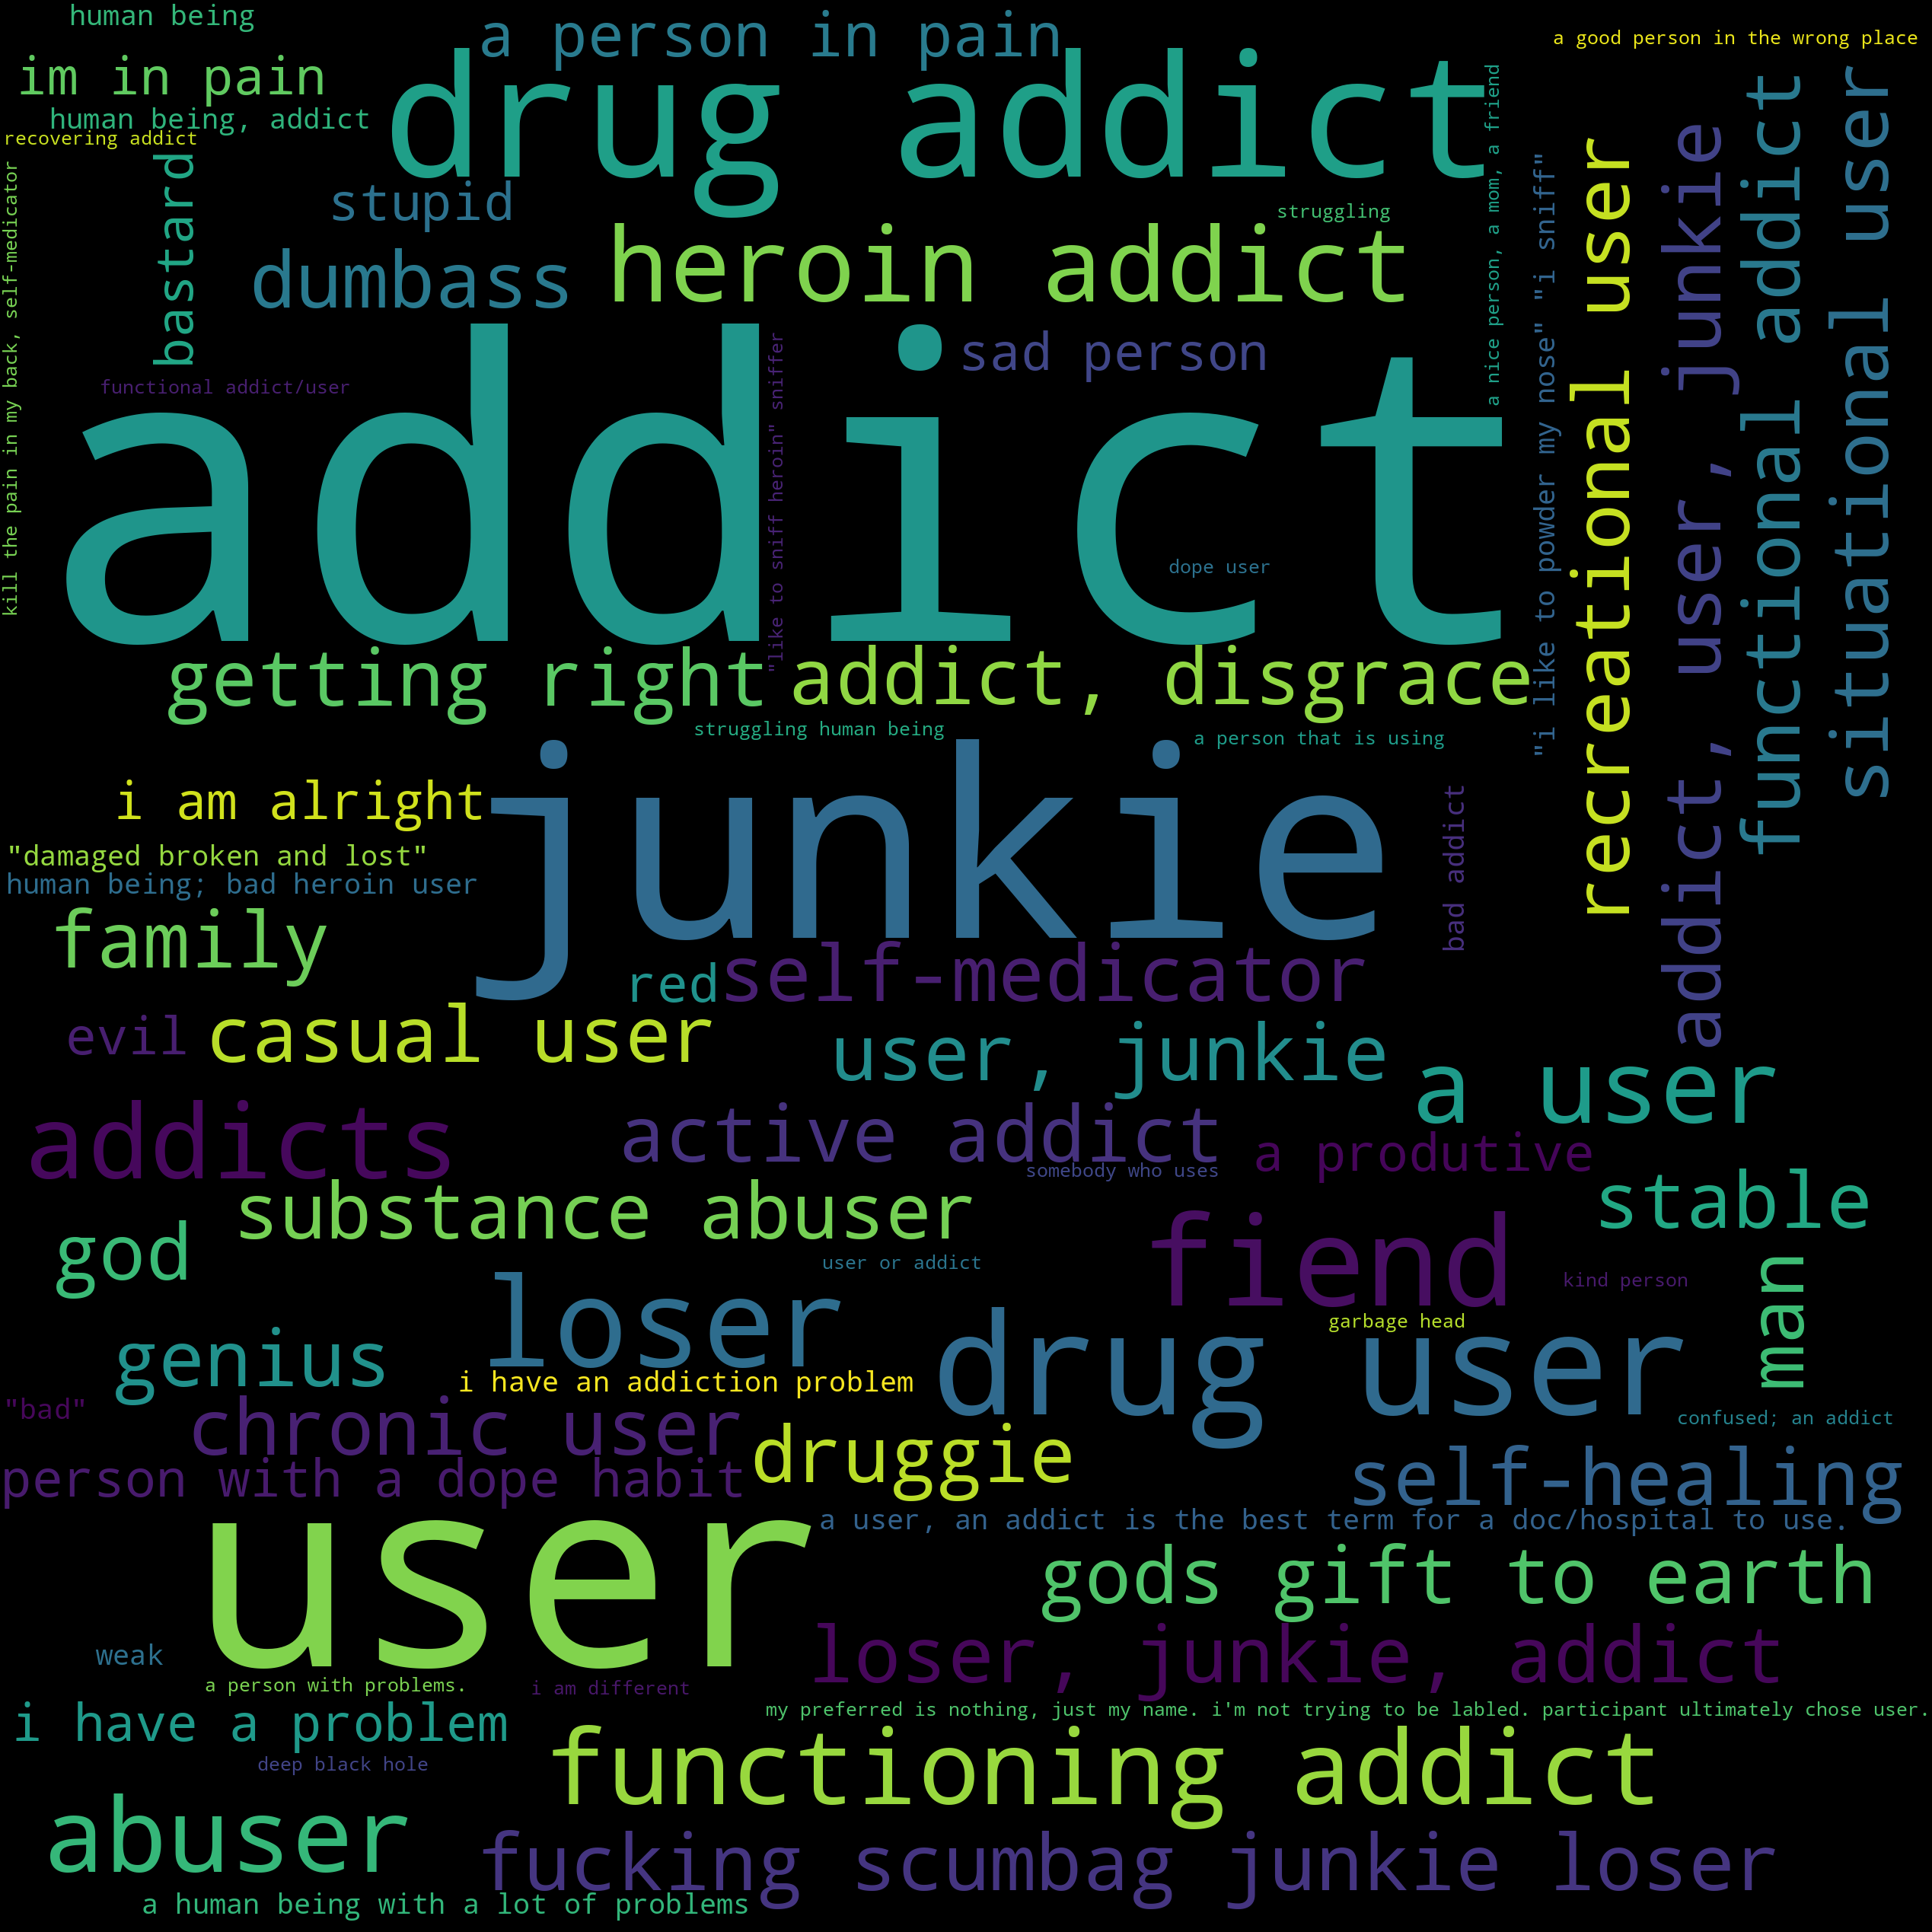

In [46]:
wc = word_cloud(names, 'in_their_words_cloud_with_minimal_prep.pdf')
wc.to_image()

In [53]:
# it = name_weights(names)

In [54]:
# next(it)

In [62]:
# Note: One response says "fiend": Was it "friend" that was meant?

remove_strings = re.compile('|'.join([
    '"', 
]))

replace_with_space = re.compile('|'.join([
    '\ a\ ', '\ an\ ', '^a\ ', '^an\ '
]))

full_substitutions = {
    'addicr': 'addict',
    'functioning addict': 'functional addict',  # to group with other mention of functioning addict
    'a user, an addict is the best term for a doc/hospital to use.': 'user, addict',
    'humbeing with lot of problems': 'a human being with lot of problems',
    "my preferred is nothing, just my name. i'm not trying to be labled. participant ultimately chose user.": 'user',
}
def str_preprocessing(string):
    if string in full_substitutions:
        print(f"---> {string}")
        string = full_substitutions[string]
    string = remove_strings.sub('', string)
    string = replace_with_space.sub(' ', string)
    return string.strip()

splitters = re.compile(',|/|\Wor\W|;')
# splitters = re.compile('alkjdfoi')

def string_to_weighed_names(string):
    split_strings = splitters.split(string)
    n = len(split_strings)
    for s in split_strings:
        yield s, 1 / n
    
def name_weights(
    strings, 
    str_preprocessing=str_preprocessing,
    string_to_weighed_names=string_to_weighed_names,
#     str_preprocessing=lambda string: string,
#     string_to_weighed_names=lambda string: [(string, 1)],
):
    for string in map(str_preprocessing, strings):
        for name, weight in string_to_weighed_names(string):
            name = name.strip()
            if name == '':
                raise ValueError(f"Oops with {string}")
            yield name, weight
        
counts = Counter()
for name, weight in name_weights(names):
    counts.update({name: weight})
    
counts = counts.most_common()
print(f"{len(counts)=}")
counts

---> a user, an addict is the best term for a doc/hospital to use.
---> functioning addict
---> my preferred is nothing, just my name. i'm not trying to be labled. participant ultimately chose user.
---> functioning addict
len(counts)=68


[('addict', 78.16666666666666),
 ('user', 26.333333333333332),
 ('junkie', 21.166666666666664),
 ('drug addict', 6.0),
 ('drug user', 4.0),
 ('functional addict', 3.5),
 ('loser', 3.333333333333333),
 ('fiend', 3.0),
 ('abuser', 2.0),
 ('heroin addict', 2.0),
 ('addicts', 2.0),
 ('human being', 2.0),
 ('self-medicator', 1.5),
 ('substance abuser', 1.0),
 ('situational user', 1.0),
 ('gods gift to earth', 1.0),
 ('active addict', 1.0),
 ('fucking scumbag junkie loser', 1.0),
 ('family', 1.0),
 ('self-healing', 1.0),
 ('casual user', 1.0),
 ('genius', 1.0),
 ('chronic user', 1.0),
 ('man', 1.0),
 ('dumbass', 1.0),
 ('druggie', 1.0),
 ('god', 1.0),
 ('recreational user', 1.0),
 ('stable', 1.0),
 ('getting right', 1.0),
 ('person in pain', 1.0),
 ('person with dope habit', 1.0),
 ('red', 1.0),
 ('bastard', 1.0),
 ('im in pain', 1.0),
 ('i have problem', 1.0),
 ('i am alright', 1.0),
 ('stupid', 1.0),
 ('sad person', 1.0),
 ('evil', 1.0),
 ('produtive', 1.0),
 ('i like to powder my nose i s

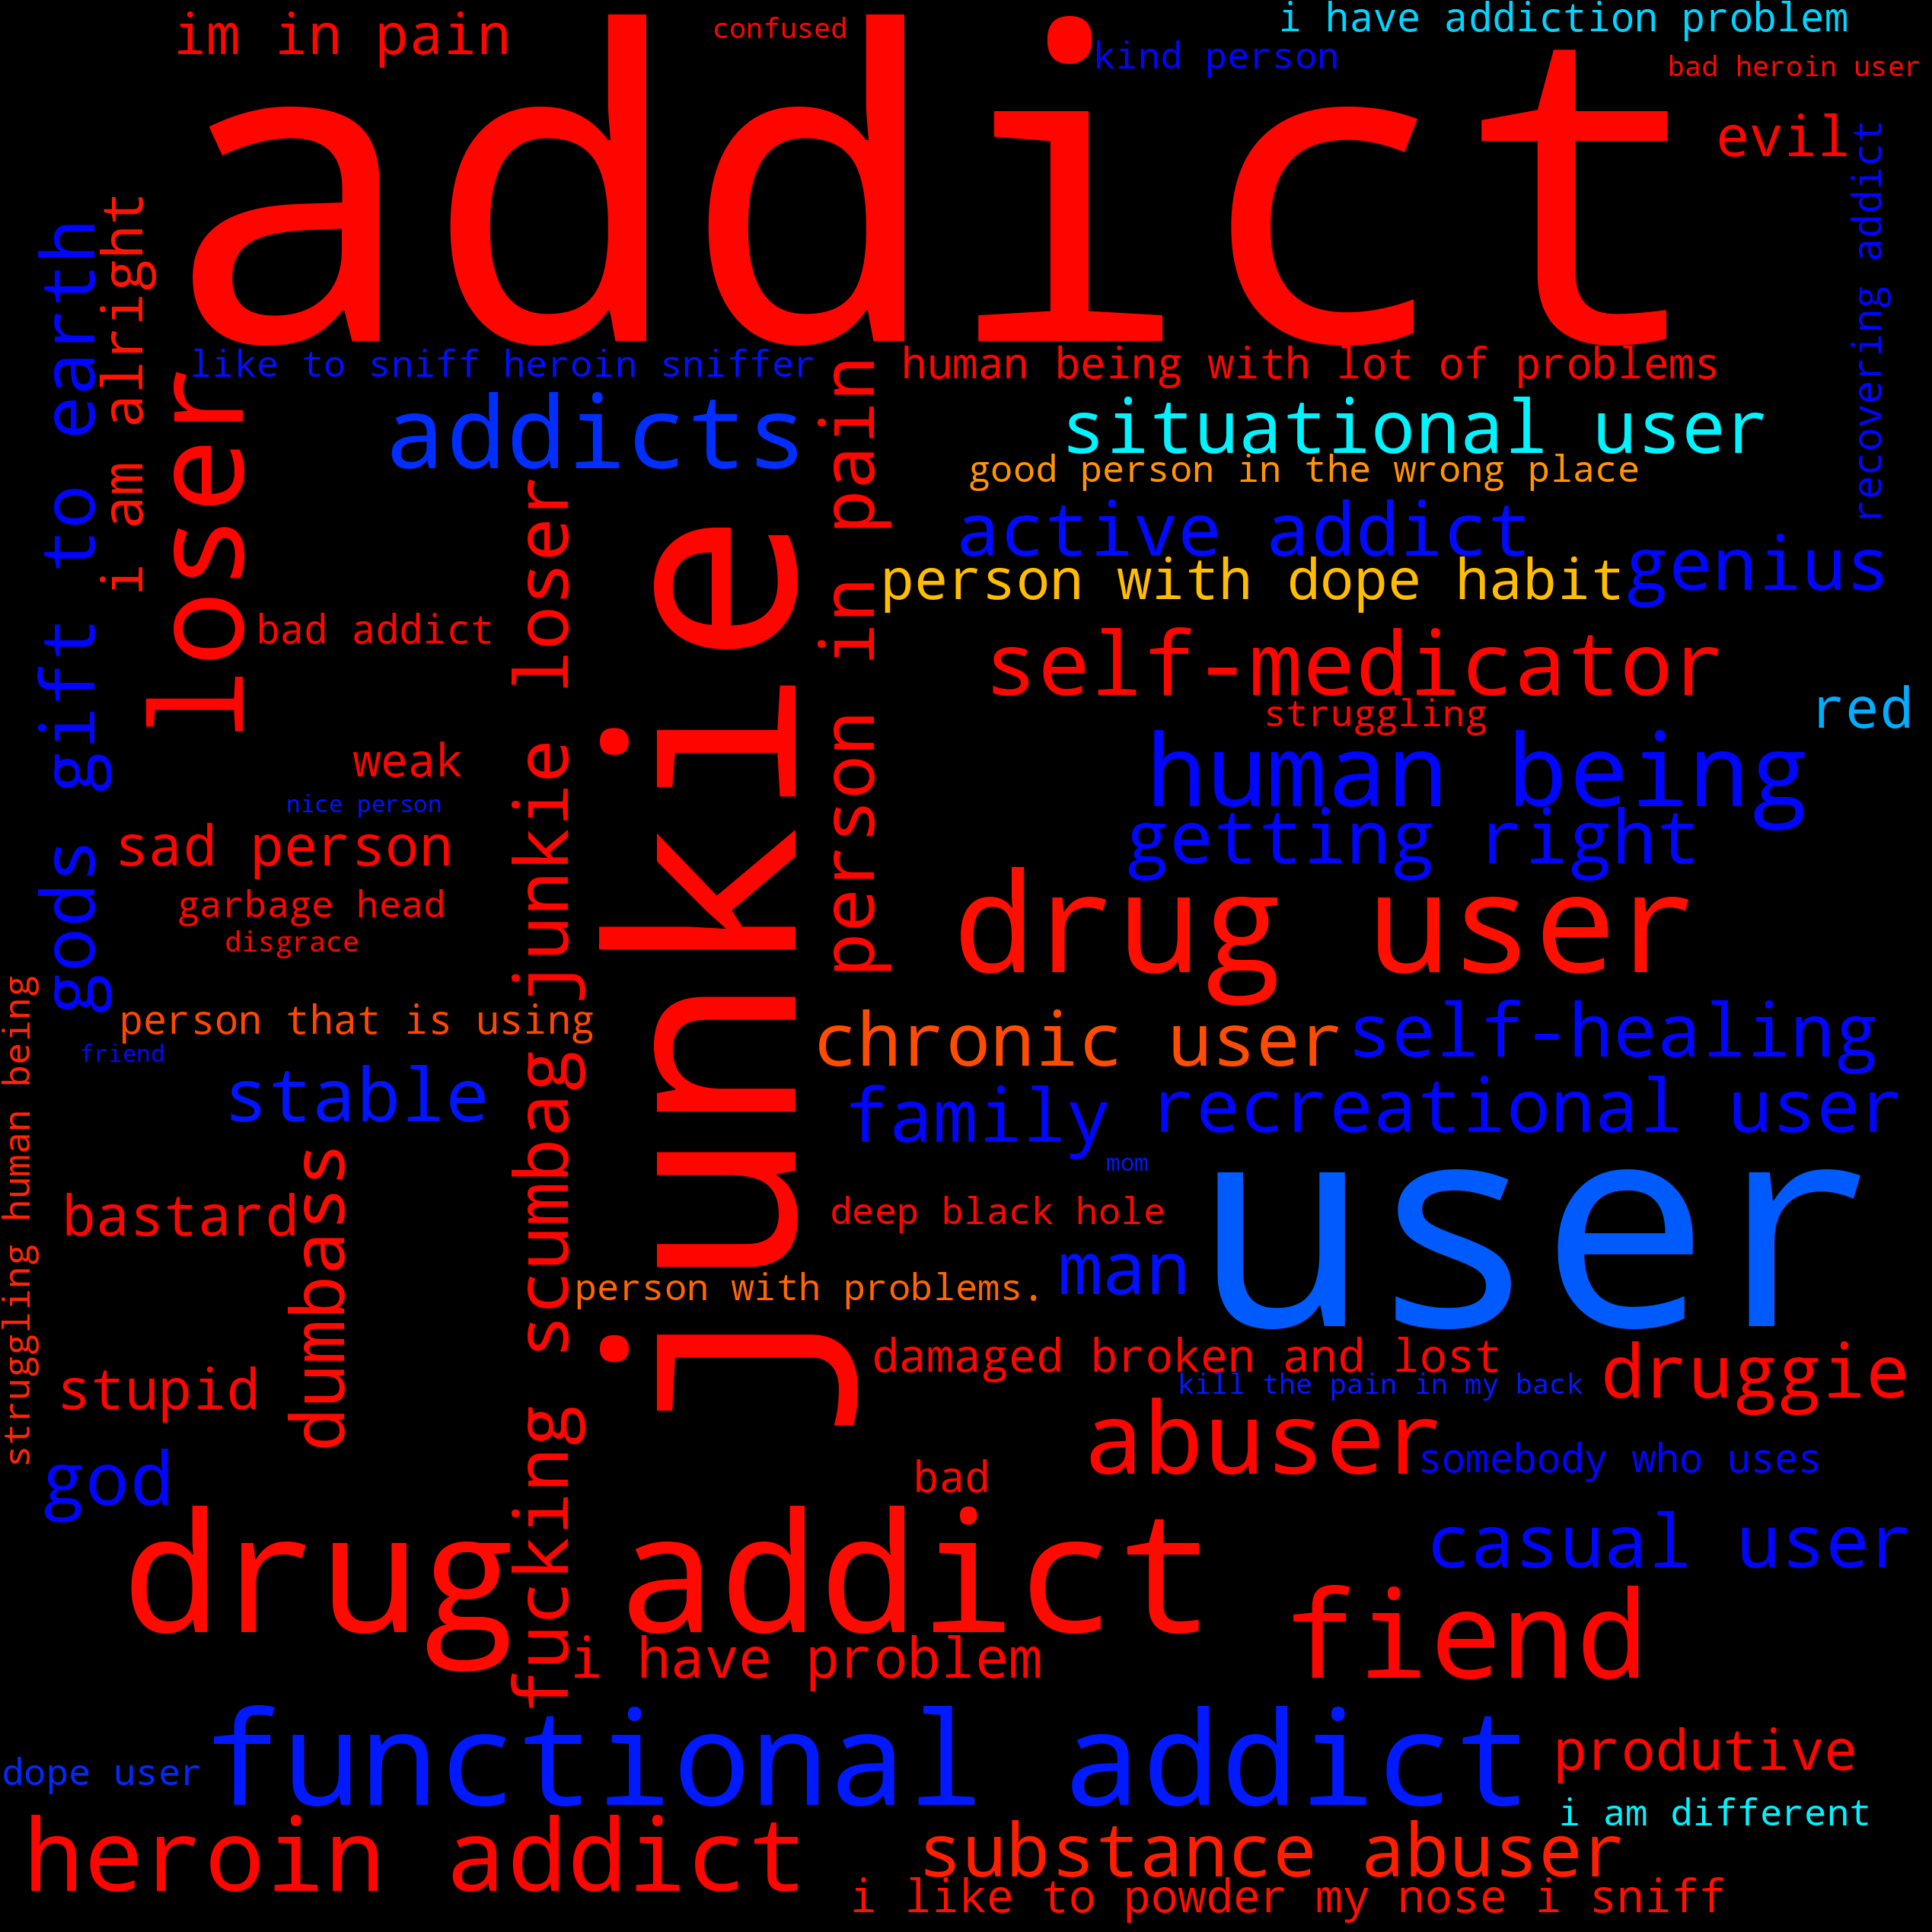

In [56]:
from colour import Color
red = Color("red")
colors = list(map(str, red.range_to(Color("blue"),202)))[1:-1]
min_score, max_score = -1, 1
score_to_index = lambda score: int(len(colors) * (score - min_score) / (max_score - min_score))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    score = sentiment_score(word)
    return colors[score_to_index(score)]
#     import random
#     return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


wc = word_cloud(dict(counts))

wc = wc.recolor(color_func=grey_color_func, random_state=3)
wc.to_file('in_their_words_cloud_2.pdf')
wc.to_image()

In [96]:
not_too_long_names = list(filter(lambda x: len(x) < 20, names))
len(not_too_long_names)

187

In [16]:
list(map(ord, 'drug addict '))
'drug addict '.strip()

'drug addict'

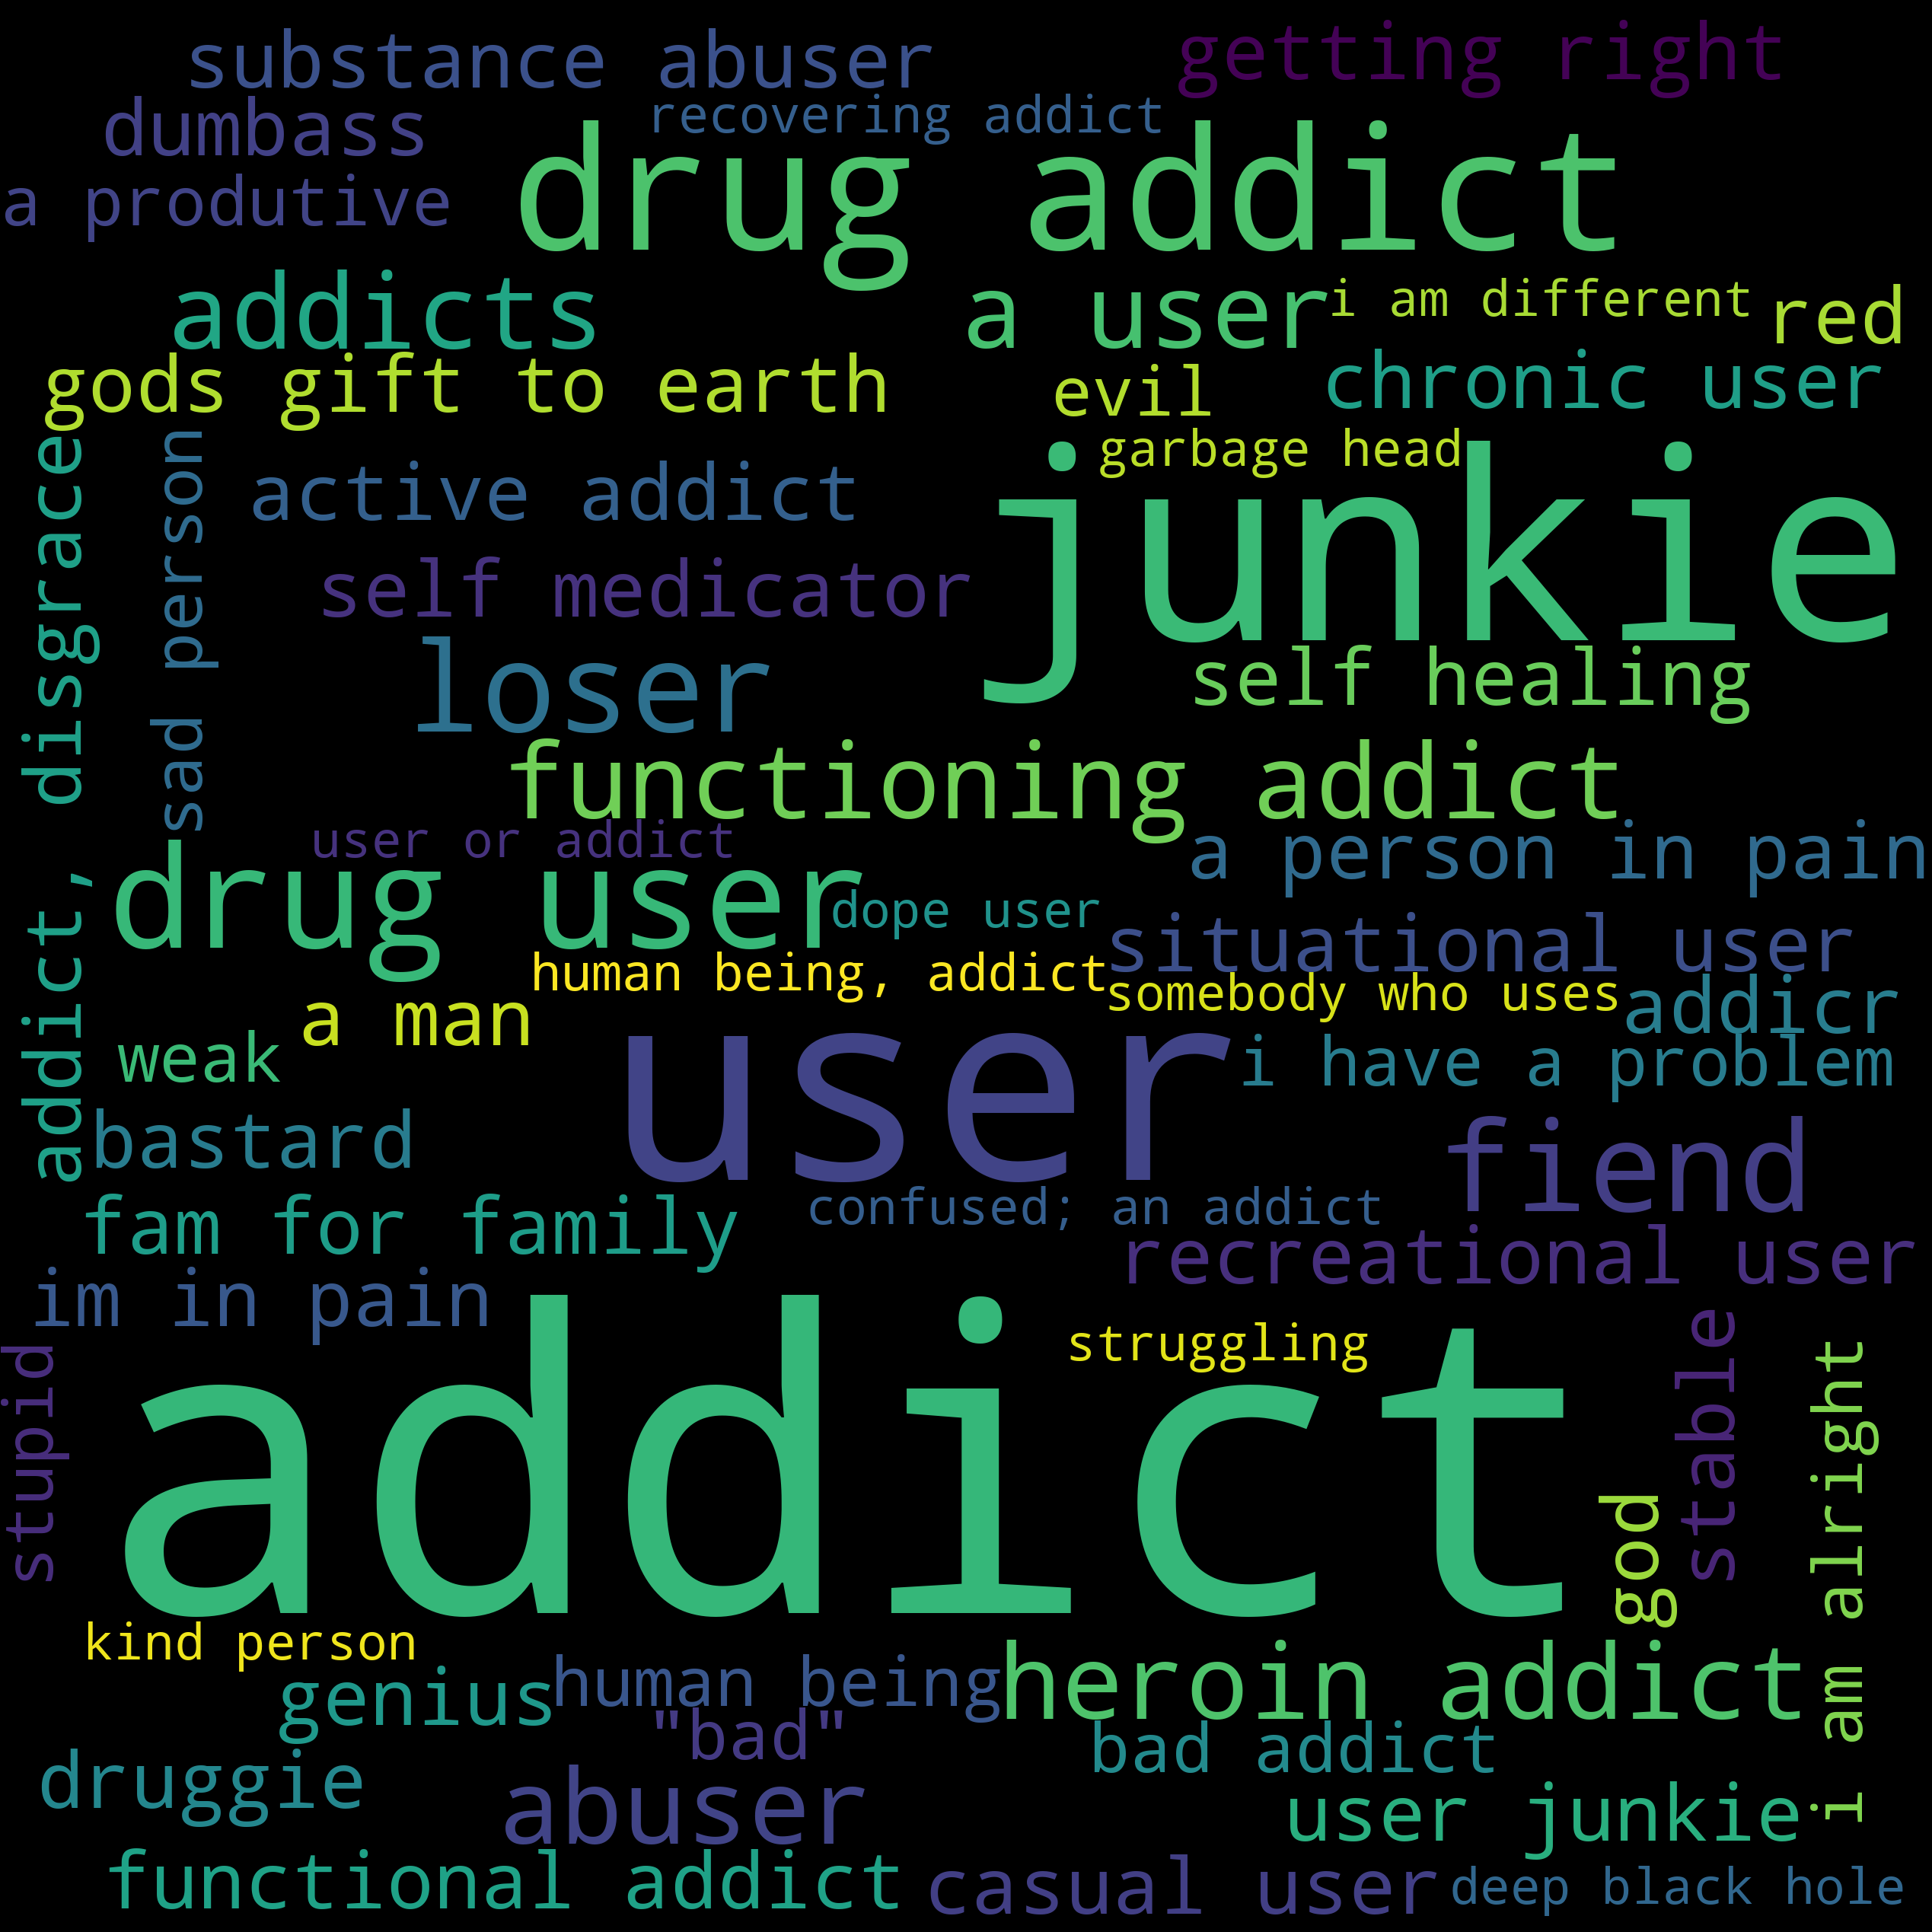

In [17]:
word_cloud(not_too_long_names, 'in_their_words_cloud.pdf').to_image()

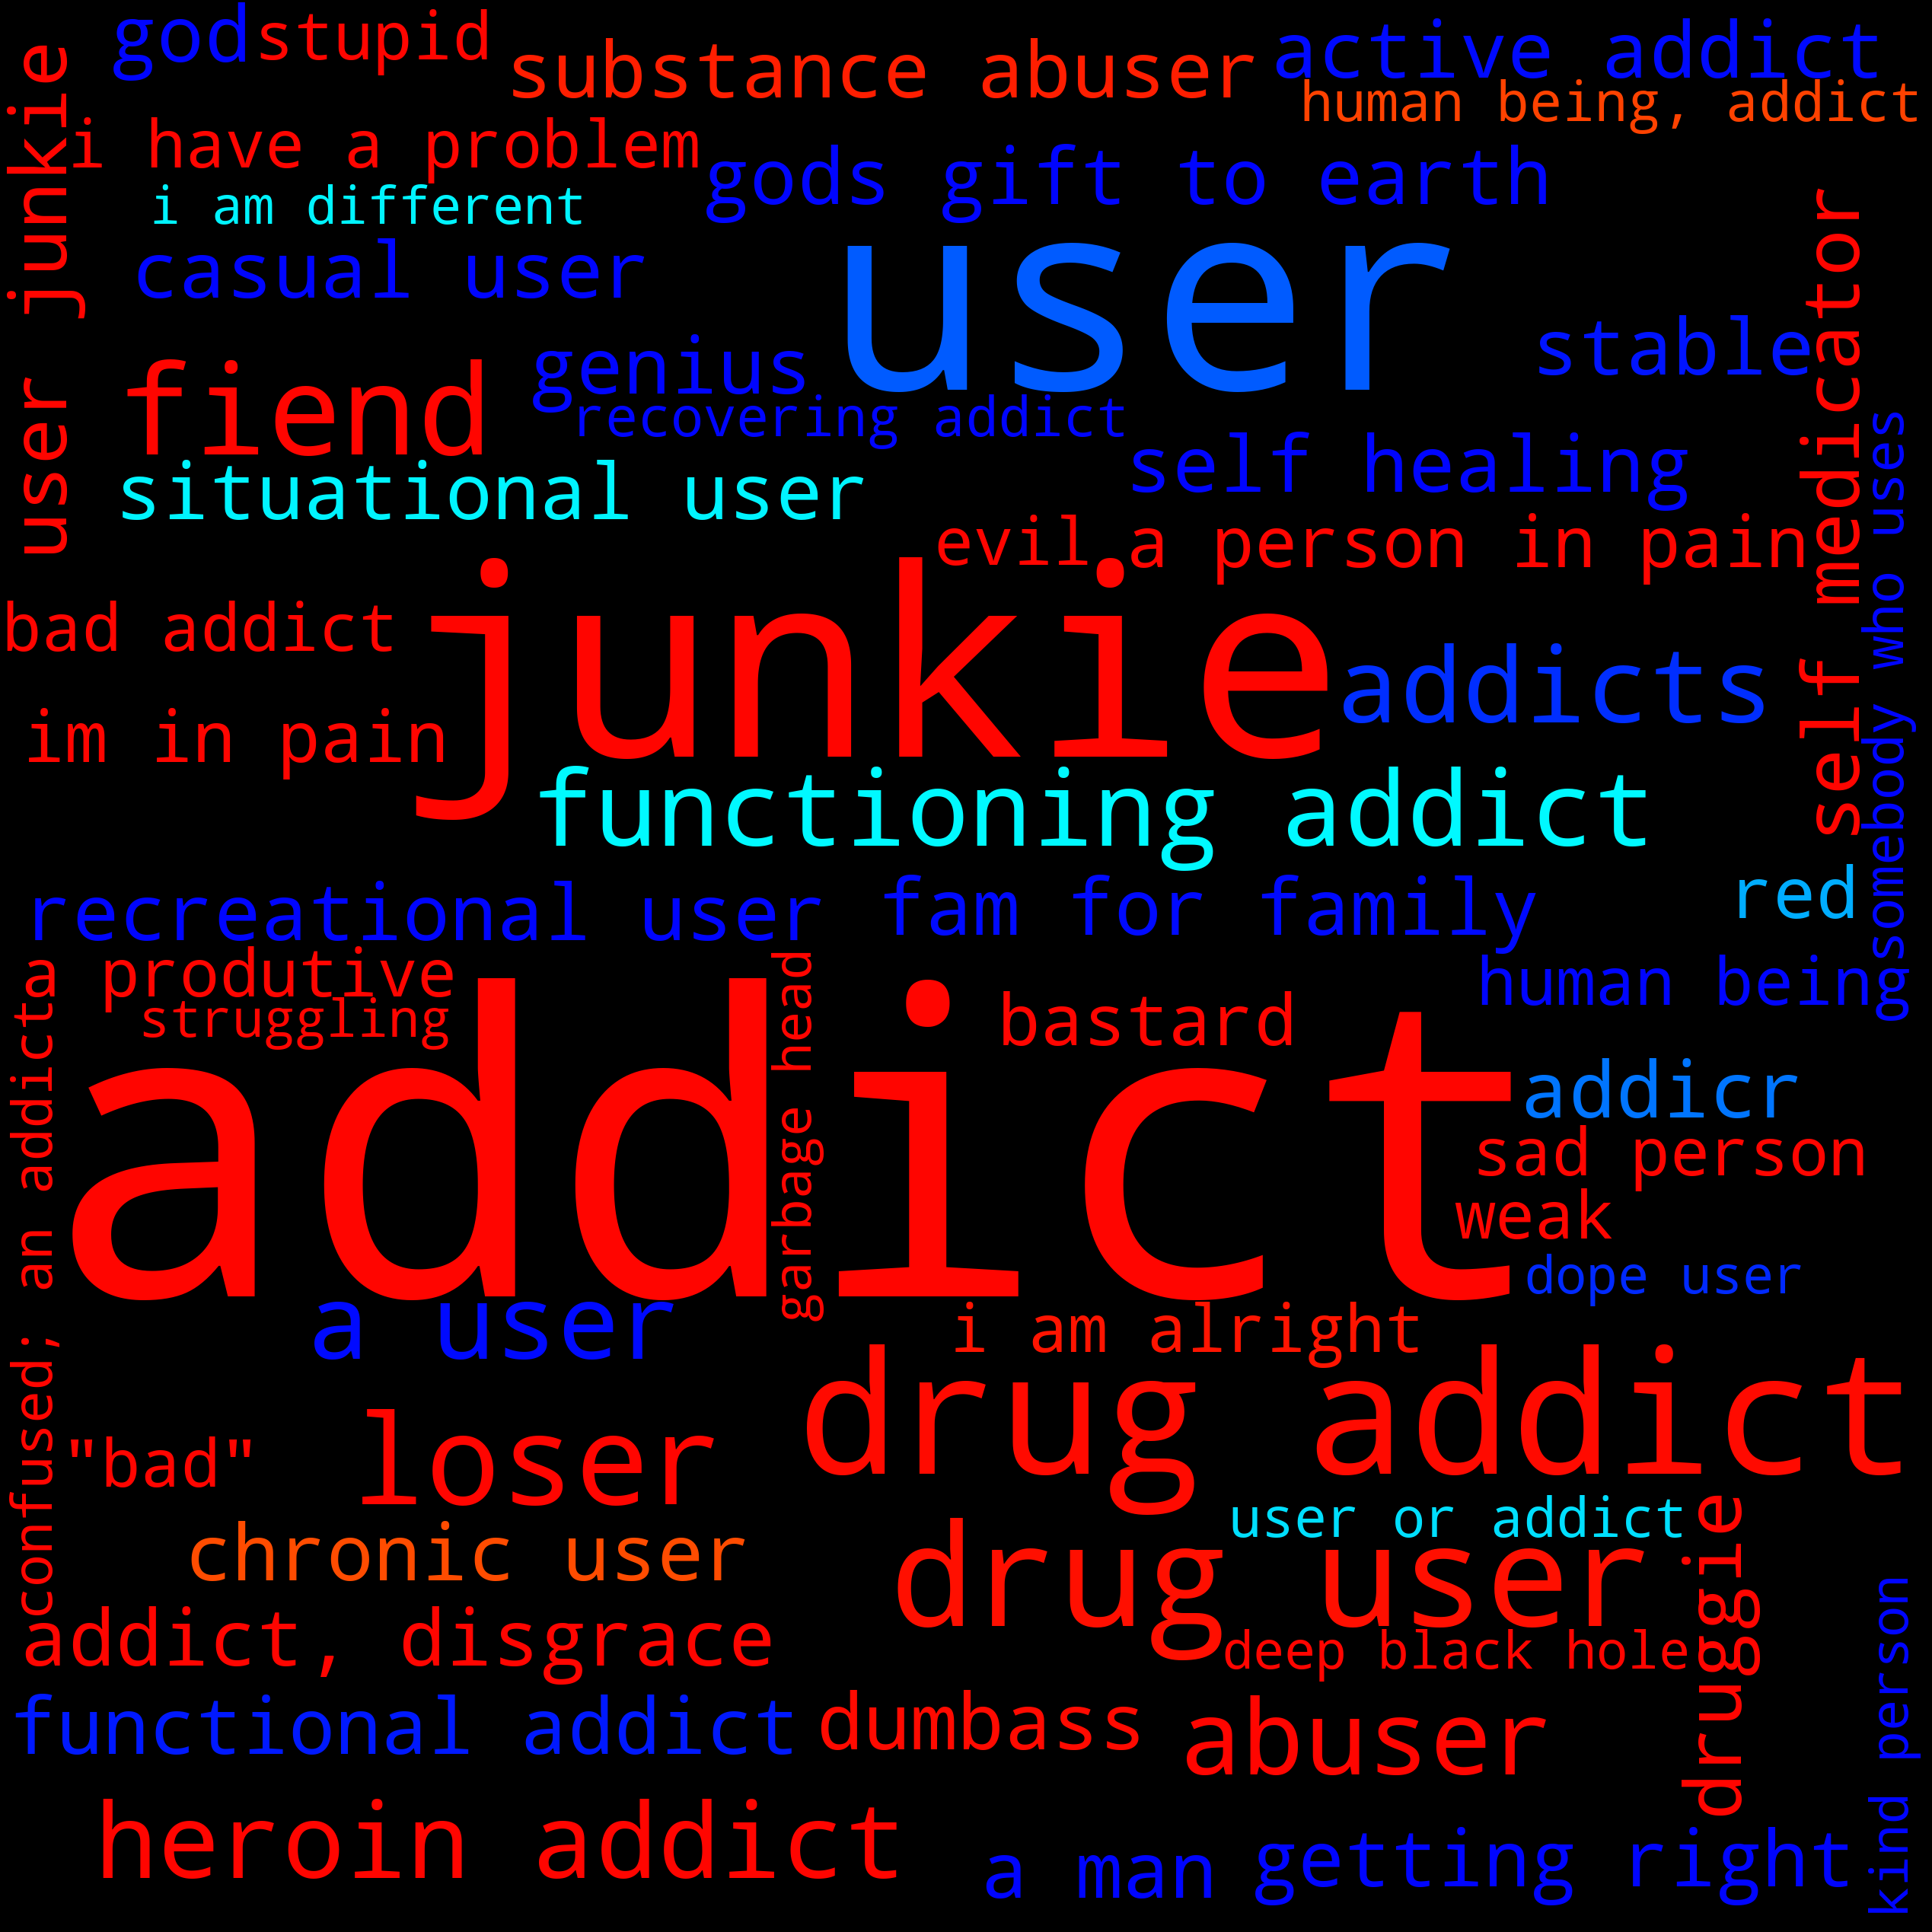

In [111]:

from colour import Color
red = Color("red")
colors = list(map(str, red.range_to(Color("blue"),202)))[1:-1]
min_score, max_score = -1, 1
score_to_index = lambda score: int(len(colors) * (score - min_score) / (max_score - min_score))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    score = sentiment_score(word)
    return colors[score_to_index(score)]
#     import random
#     return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc = word_cloud(not_too_long_names)
wc = wc.recolor(color_func=grey_color_func, random_state=3).to_image()
wc.to_file('in_their_words_cloud.pdf')
wc

In [107]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("blue"),202))[1:-1]
t = colors[0]
dir(t)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_hsl',
 'equality',
 'get_blue',
 'get_green',
 'get_hex',
 'get_hex_l',
 'get_hsl',
 'get_hue',
 'get_luminance',
 'get_red',
 'get_rgb',
 'get_saturation',
 'get_web',
 'range_to',
 'set_blue',
 'set_green',
 'set_hex',
 'set_hex_l',
 'set_hsl',
 'set_hue',
 'set_luminance',
 'set_red',
 'set_rgb',
 'set_saturation',
 'set_web']

'#ff0500'

## Contextual word categories

In [480]:
term_mapping = {
    'addict': 'Addict',
    'slang': 'Slang',
    'user': 'User',
    'other': 'Other',
}

In [481]:
term_category = data['Q14']
term_category = term_category.apply(term_mapping.get)
term_category.name = 'label'
pd.Series(Counter(term_category)).sort_values(ascending=False)

Addict    97
Other     44
User      39
Slang     26
dtype: int64

In [482]:
q2_cols = data.columns[[
    c.startswith('Q2') 
    for c in data.columns]]
q2_cols

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5'], dtype='object')

In [483]:
q2_questions = list(map(questions.__getitem__, q2_cols))
q2_questions

['2. Do you use the same label or another when\ntalking to: - others who use drugs',
 '2. Do you use the same label or another when\ntalking to: - drug counselors',
 '2. Do you use the same label or another when\ntalking to: - doctors',
 '2. Do you use the same label or another when\ntalking to: - family',
 '2. Do you use the same label or another when\ntalking to: - 12-Step mutual support members']

In [484]:
context_labels = list(map(extract_end_of_large_question, q2_questions))
label_mapping = {
    'others who use drugs': 'Others who use',
    'drug counselors': 'Counselor',
    'family': 'Family',
    'doctors': 'Doctor',
    '12-Step mutual support members': '12-Step'
}
# Map data (automatically extracted) labels to the ones used in paper
if set(label_mapping) == set(context_labels):
    context_labels = list(map(label_mapping.get, context_labels))
else:
    print(f"Oops, wasn't as expected. Using raw context_labels instead.")

context_labels

['Others who use', 'Counselor', 'Doctor', 'Family', '12-Step']

In [485]:
s = data[q2_cols]
s.columns = context_labels
s = s.applymap(lambda x: {'Yes': True, 'No': False}.get(x, x))
s

,Others who use,Counselor,Doctor,Family,12-Step
1,True,True,False,True,True
2,True,True,False,True,True
3,True,True,True,True,NaN
4,True,True,True,True,False
5,False,NaN,False,NaN,NaN
...,...,...,...,...,...
202,True,True,True,True,True
203,True,True,True,True,True
204,False,False,False,False,True
205,True,True,True,True,True


In [514]:
def iter_pairs(category, contexts):
    for context, context_vals in contexts.items():
        for cat, context_val in zip(category, context_vals):
            if context_val is True:
                yield context, cat


n = len(s)

other_counts = Counter(iter_pairs(term_category, s))
other_counts = pd.Series(other_counts).unstack().T
other_counts = other_counts.loc[list(term_mapping.values())][list(label_mapping.values())]

self_counts = pd.Series(Counter(term_category)).sort_values(ascending=False)
self_counts.name = 'Self'

counts = pd.concat([self_counts, other_counts], axis=1)
# reorder index and columns
counts = counts.loc[list(term_mapping.values())][['Self'] + list(label_mapping.values())]

total_counts = counts.sum(); 
total_counts.name = 'n'

all_counts = pd.concat([counts, pd.DataFrame(total_counts).T], axis=0)
all_counts

,Self,Others who use,Counselor,Family,Doctor,12-Step
Addict,97,78,86,69,80,72
Slang,26,14,11,12,10,8
User,39,30,33,27,32,27
Other,44,26,25,21,19,19
n,206,148,155,129,141,126


In [515]:
term_category

1       Other
2      Addict
3       Slang
4      Addict
5        User
        ...  
202    Addict
203    Addict
204     Other
205    Addict
206      User
Name: label, Length: 206, dtype: object

In [516]:
percentages = ((all_counts / all_counts.loc['n'])).applymap(convert_to_percentage)
percentages

,Self,Others who use,Counselor,Family,Doctor,12-Step
Addict,47.1,52.7,55.5,53.5,56.7,57.1
Slang,12.6,9.5,7.1,9.3,7.1,6.3
User,18.9,20.3,21.3,20.9,22.7,21.4
Other,21.4,17.6,16.1,16.3,13.5,15.1
n,100.0,100.0,100.0,100.0,100.0,100.0


In [517]:
missing = n - total_counts; missing.name = 'NA/missing'
missing

Self               0
Others who use    58
Counselor         51
Family            77
Doctor            65
12-Step           80
Name: NA/missing, dtype: int64

The table below corresponds to table 2 of the original article

In [518]:
@np.vectorize
def _elementwise_string_join(*elements, sep=' '):
    return sep.join(map(str, elements))

def elementwise_string_join(*elements, sep=' '):
    first_df, *_ = elements
    return pd.DataFrame(
        data=_elementwise_string_join(*elements, sep=sep),
        columns=first_df.columns,
        index=first_df.index,
    )


In [519]:
t = elementwise_string_join(all_counts, percentages.applymap(lambda x: f"({x}%)"))
t = pd.concat([t, pd.DataFrame(missing).T], axis=0)
print(t.to_string(col_space=[16] * len(t.columns)))

                       Self   Others who use        Counselor           Family           Doctor          12-Step
Addict           97 (47.1%)       78 (52.7%)       86 (55.5%)       69 (53.5%)       80 (56.7%)       72 (57.1%)
Slang            26 (12.6%)        14 (9.5%)        11 (7.1%)        12 (9.3%)        10 (7.1%)         8 (6.3%)
User             39 (18.9%)       30 (20.3%)       33 (21.3%)       27 (20.9%)       32 (22.7%)       27 (21.4%)
Other            44 (21.4%)       26 (17.6%)       25 (16.1%)       21 (16.3%)       19 (13.5%)       19 (15.1%)
n              206 (100.0%)     148 (100.0%)     155 (100.0%)     129 (100.0%)     141 (100.0%)     126 (100.0%)
NA/missing                0               58               51               77               65               80


In [520]:
from statsmodels.stats.proportion import proportion_confint

def proportion_confint_for_df(counts=counts):
    total_counts = counts.sum()
    def gen():
        for cat in counts.columns:
            # note: method='beta' is for the so-called "exact" method
            lo, hi = proportion_confint(counts[cat], total_counts[cat], method='beta', alpha=0.05)
            lo *= 100
            hi *= 100
            series = pd.Series(
                data=list(map(lambda x: f"[{x[0]:.1f}-{x[1]:.1f}%]", zip(lo, hi))),
                index = counts.index
            )
            series.name = cat
            yield series
    return pd.DataFrame(gen()).T


t = elementwise_string_join(counts, proportion_confint_for_df(counts))
t = pd.concat([
    t, 
    pd.DataFrame(total_counts.apply(lambda x: f"{x} (100%)")).T, 
    pd.DataFrame(missing).T], axis=0)
print(t.to_string(col_space=[16] * len(t.columns)))

                       Self   Others who use        Counselor           Family           Doctor          12-Step
Addict      97 [40.1-54.1%]  78 [44.3-61.0%]  86 [47.3-63.5%]  69 [44.5-62.3%]  80 [48.1-65.0%]  72 [48.0-65.9%]
Slang        26 [8.4-17.9%]   14 [5.3-15.4%]   11 [3.6-12.3%]   12 [4.9-15.7%]   10 [3.5-12.7%]    8 [2.8-12.1%]
User        39 [13.8-25.0%]  30 [14.1-27.7%]  33 [15.1-28.6%]  27 [14.3-29.0%]  32 [16.1-30.5%]  27 [14.6-29.6%]
Other       44 [16.0-27.6%]  26 [11.8-24.7%]  25 [10.7-22.9%]  21 [10.4-23.8%]   19 [8.3-20.2%]   19 [9.3-22.5%]
n                206 (100%)       148 (100%)       155 (100%)       129 (100%)       141 (100%)       126 (100%)
NA/missing                0               58               51               77               65               80


In [521]:
t = elementwise_string_join(
    (100 * counts / counts.sum()).applymap(lambda x: f"{x:.2f}%"), 
    proportion_confint_for_df(counts)
)
t = pd.concat([
    t, 
    pd.DataFrame(total_counts.apply(lambda x: f"{x} (100%)")).T, 
    pd.DataFrame(missing).T], axis=0)
print(t.to_string(col_space=[14] * len(t.columns)))

                           Self       Others who use            Counselor               Family               Doctor              12-Step
Addict      47.09% [40.1-54.1%]  52.70% [44.3-61.0%]  55.48% [47.3-63.5%]  53.49% [44.5-62.3%]  56.74% [48.1-65.0%]  57.14% [48.0-65.9%]
Slang        12.62% [8.4-17.9%]    9.46% [5.3-15.4%]    7.10% [3.6-12.3%]    9.30% [4.9-15.7%]    7.09% [3.5-12.7%]    6.35% [2.8-12.1%]
User        18.93% [13.8-25.0%]  20.27% [14.1-27.7%]  21.29% [15.1-28.6%]  20.93% [14.3-29.0%]  22.70% [16.1-30.5%]  21.43% [14.6-29.6%]
Other       21.36% [16.0-27.6%]  17.57% [11.8-24.7%]  16.13% [10.7-22.9%]  16.28% [10.4-23.8%]   13.48% [8.3-20.2%]   15.08% [9.3-22.5%]
n                    206 (100%)           148 (100%)           155 (100%)           129 (100%)           141 (100%)           126 (100%)
NA/missing                    0                   58                   51                   77                   65                   80


In [522]:
t = elementwise_string_join(
    counts,
    (100 * counts / counts.sum()).applymap(lambda x: f"({x:.2f}%)"), 
    proportion_confint_for_df(counts)
)
t = pd.concat([
    t, 
    pd.DataFrame(total_counts.apply(lambda x: f"{x} (100%)")).T, 
    pd.DataFrame(missing).T], axis=0)
print(t.to_string(col_space=[14] * len(t.columns)))

                                Self            Others who use                 Counselor                    Family                    Doctor                   12-Step
Addict      97 (47.09%) [40.1-54.1%]  78 (52.70%) [44.3-61.0%]  86 (55.48%) [47.3-63.5%]  69 (53.49%) [44.5-62.3%]  80 (56.74%) [48.1-65.0%]  72 (57.14%) [48.0-65.9%]
Slang        26 (12.62%) [8.4-17.9%]    14 (9.46%) [5.3-15.4%]    11 (7.10%) [3.6-12.3%]    12 (9.30%) [4.9-15.7%]    10 (7.09%) [3.5-12.7%]     8 (6.35%) [2.8-12.1%]
User        39 (18.93%) [13.8-25.0%]  30 (20.27%) [14.1-27.7%]  33 (21.29%) [15.1-28.6%]  27 (20.93%) [14.3-29.0%]  32 (22.70%) [16.1-30.5%]  27 (21.43%) [14.6-29.6%]
Other       44 (21.36%) [16.0-27.6%]  26 (17.57%) [11.8-24.7%]  25 (16.13%) [10.7-22.9%]  21 (16.28%) [10.4-23.8%]   19 (13.48%) [8.3-20.2%]   19 (15.08%) [9.3-22.5%]
n                         206 (100%)                148 (100%)                155 (100%)                129 (100%)                141 (100%)                126 (100%

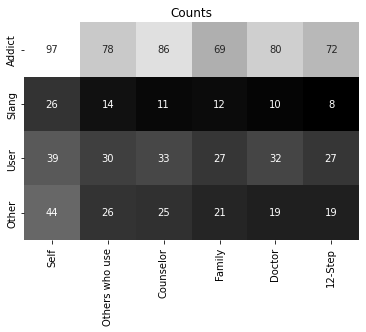

In [529]:
# from oplot import heatmap

# def myheatmap(*args, **kwargs):
#     heatmap(*args, **kwargs);
#     plt.grid(False);

from functools import partial, wraps
import seaborn as sns
from i2 import Pipe

_heatmap = partial(sns.heatmap, annot=True, cbar=False)

@wraps(sns.heatmap)
def myheatmap(*args, fmt="d", cmap='gray', **kwargs):
    return _heatmap(*args, **kwargs, cmap=cmap, fmt=fmt)

myheatmap(counts); plt.title("Counts");

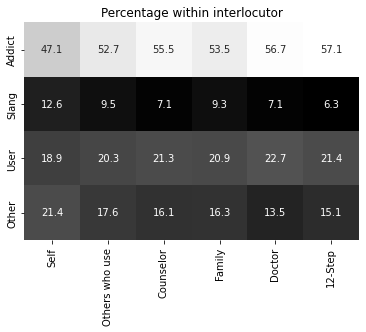

In [530]:
myheatmap(100 * counts / counts.sum(), fmt=".1f"); 
plt.title("Percentage within interlocutor");

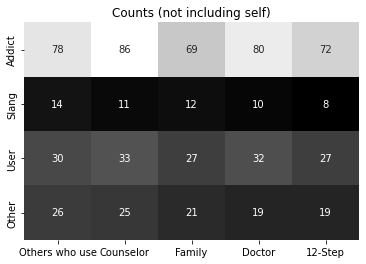

In [531]:
myheatmap(other_counts); 
plt.title("Counts (not including self)");

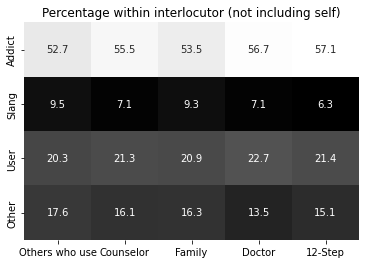

In [532]:
myheatmap(100 * other_counts / other_counts.sum(), fmt=".1f"); 
plt.title("Percentage within interlocutor (not including self)");

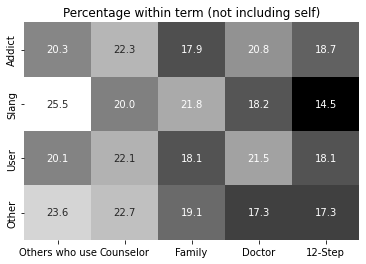

In [533]:
myheatmap(100 * (other_counts.T / other_counts.sum(axis=1)).T, fmt=".1f")
plt.title("Percentage within term (not including self)");

## Labels

In [129]:
q3_cols = data.columns[[(
    c.startswith('Q3') 
    and not c.endswith('_TEXT') 
    and not c.endswith('_13'))
    for c in data.columns]]
q3_cols

Index(['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q3_9',
       'Q3_10', 'Q3_11', 'Q3_12'],
      dtype='object')

In [130]:
len(q3_cols)  # 12 categories! Ha! 12-steps!

12

In [131]:
q3_questions = list(map(questions.__getitem__, q3_cols))
print(q3_questions[0])  # just to print an example

3. If
you could choose how other people refer to you, which of the below terms would
you prefer?

Score each label with a number from  1 (‘I would never want to be called this’) to
7 (‘I would prefer to be called this’). - Heroin addict


In [132]:
labels = list(map(extract_end_of_large_question, q3_questions))
labels

['Heroin addict',
 'Heroin-dependent',
 'Heroin abuser',
 'Heroin misuser',
 'Heroin user',
 'Person with heroin addiction',
 'Person with heroin dependence',
 'Person who abuses heroin',
 'Person who uses heroin',
 'Person addicted to heroin',
 'Person with heroin problem',
 'Person who uses drugs']

In [133]:
max_q3 = list(map(max, data[q3_cols]))

In [134]:
# Get q3 data as int or nan (orig is str or missing)
d = data[q3_cols].applymap(lambda x: int(x) if isinstance(x, str) else x)
d.columns = labels
d

,Heroin addict,Heroin-dependent,Heroin abuser,Heroin misuser,Heroin user,Person with heroin addiction,Person with heroin dependence,Person who abuses heroin,Person who uses heroin,Person addicted to heroin,Person with heroin problem,Person who uses drugs
1,3,5.0,5,7.0,7,7,7,7.0,7,3,6.0,7.0
2,2,1.0,1,2.0,2,1,2,2.0,7,2,3.0,7.0
3,7,7.0,4,1.0,7,7,7,1.0,7,7,1.0,7.0
4,4,3.0,1,1.0,7,4,2,1.0,7,5,1.0,7.0
5,1,1.0,1,1.0,1,1,1,1.0,4,3,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,1.0,1,1.0,4,1,1,1.0,4,4,4.0,2.0
203,1,1.0,1,1.0,1,1,1,1.0,1,1,1.0,1.0
204,1,6.0,6,1.0,5,6,6,6.0,6,6,6.0,6.0
205,3,3.0,3,3.0,3,5,4,2.0,3,3,5.0,1.0


In [159]:
d

,Heroin addict,Heroin-dependent,Heroin abuser,Heroin misuser,Heroin user,Person with heroin addiction,Person with heroin dependence,Person who abuses heroin,Person who uses heroin,Person addicted to heroin,Person with heroin problem,Person who uses drugs
1,3,5.0,5,7.0,7,7,7,7.0,7,3,6.0,7.0
2,2,1.0,1,2.0,2,1,2,2.0,7,2,3.0,7.0
3,7,7.0,4,1.0,7,7,7,1.0,7,7,1.0,7.0
4,4,3.0,1,1.0,7,4,2,1.0,7,5,1.0,7.0
5,1,1.0,1,1.0,1,1,1,1.0,4,3,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,1.0,1,1.0,4,1,1,1.0,4,4,4.0,2.0
203,1,1.0,1,1.0,1,1,1,1.0,1,1,1.0,1.0
204,1,6.0,6,1.0,5,6,6,6.0,6,6,6.0,6.0
205,3,3.0,3,3.0,3,5,4,2.0,3,3,5.0,1.0


In [160]:
d.mean()

Heroin addict                    3.077670
Heroin-dependent                 3.526829
Heroin abuser                    2.956311
Heroin misuser                   2.882927
Heroin user                      4.398058
Person with heroin addiction     4.631068
Person with heroin dependence    4.373786
Person who abuses heroin         3.268293
Person who uses heroin           4.805825
Person addicted to heroin        4.665049
Person with heroin problem       4.868293
Person who uses drugs            5.299020
dtype: float64

In [169]:
t = {
    'Never': d.apply(lambda x: x == 1).sum() / len(d),
    'Prefer': d.apply(lambda x: x == 7).sum() / len(d), 
    'Mean (std)': list(zip(d.mean(), d.std())),
    'Median': d.median(),
}

t = pd.DataFrame(t)
t.index.name = 'Label'

print(t.to_string(
    col_space=[14] * 4,
    formatters={
        'Never': lambda x: f"{x * 100:.01f}%",
        'Prefer': lambda x: f"{x * 100:.01f}%",
        'Mean (std)': lambda x: f"{x[0] :.02f} ({x[1]:.02f})",
        'Median': lambda x: f"{x:.01f}",
    }
))

                                       Never         Prefer     Mean (std)         Median
Label                                                                                    
Heroin addict                          45.6%          14.6%    3.08 (2.27)            2.5
Heroin-dependent                       36.4%          17.0%    3.53 (2.31)            4.0
Heroin abuser                          49.0%          14.1%    2.96 (2.30)            2.0
Heroin misuser                         45.6%          10.7%    2.88 (2.15)            2.0
Heroin user                            22.8%          28.6%    4.40 (2.33)            5.0
Person with heroin addiction           22.3%          34.5%    4.63 (2.38)            5.0
Person with heroin dependence          24.8%          28.6%    4.37 (2.38)            5.0
Person who abuses heroin               39.8%          16.5%    3.27 (2.32)            3.0
Person who uses heroin                 17.5%          37.4%    4.81 (2.29)            6.0
Person add

In [151]:
help(pd.DataFrame.to_string)

Help on function to_string in module pandas.core.frame:

to_string(self, buf: 'FilePath | WriteBuffer[str] | None' = None, columns: 'Sequence[str] | None' = None, col_space: 'int | list[int] | dict[Hashable, int] | None' = None, header: 'bool | Sequence[str]' = True, index: 'bool' = True, na_rep: 'str' = 'NaN', formatters: 'fmt.FormattersType | None' = None, float_format: 'fmt.FloatFormatType | None' = None, sparsify: 'bool | None' = None, index_names: 'bool' = True, justify: 'str | None' = None, max_rows: 'int | None' = None, max_cols: 'int | None' = None, show_dimensions: 'bool' = False, decimal: 'str' = '.', line_width: 'int | None' = None, min_rows: 'int | None' = None, max_colwidth: 'int | None' = None, encoding: 'str | None' = None) -> 'str | None'
    Render a DataFrame to a console-friendly tabular output.
    
    Parameters
    ----------
    buf : str, Path or StringIO-like, optional, default None
        Buffer to write to. If None, the output is returned as a string.
    c

In [135]:
# Never (score == 1)
never = d.apply(lambda x: x == 1).sum() / len(d)
never.name = 'never'
never

Heroin addict                    0.456311
Heroin-dependent                 0.364078
Heroin abuser                    0.490291
Heroin misuser                   0.456311
Heroin user                      0.228155
Person with heroin addiction     0.223301
Person with heroin dependence    0.247573
Person who abuses heroin         0.398058
Person who uses heroin           0.174757
Person addicted to heroin        0.189320
Person with heroin problem       0.174757
Person who uses drugs            0.111650
Name: never, dtype: float64

In [136]:
# Prefer (score == 7)
prefer = d.apply(lambda x: x == 7).sum() / len(d)
prefer.name = 'prefer'
prefer

Heroin addict                    0.145631
Heroin-dependent                 0.169903
Heroin abuser                    0.140777
Heroin misuser                   0.106796
Heroin user                      0.286408
Person with heroin addiction     0.344660
Person with heroin dependence    0.286408
Person who abuses heroin         0.165049
Person who uses heroin           0.373786
Person addicted to heroin        0.359223
Person with heroin problem       0.398058
Person who uses drugs            0.485437
Name: prefer, dtype: float64

But note that "never" and "prefer" do not mean "least favorite" and "most favorite".

Indeed, some respondents' score do not stretch from 1 to 7 inclusive.

In [137]:
pd.Series(Counter(d.apply(np.min, axis=1))).sort_values(ascending=False)

1.0    159
3.0     15
4.0     12
2.0      9
7.0      5
6.0      4
5.0      2
dtype: int64

In [138]:
pd.Series(Counter(d.apply(np.max, axis=1))).sort_values(ascending=False)

7.0    152
6.0     15
5.0     14
4.0     11
3.0      7
2.0      4
1.0      3
dtype: int64

The kind of measurement used here (1 to 7, to denote a degree of preference) is called 
likert scale (https://en.wikipedia.org/wiki/Likert_scale). 

Different people project their subjectivity in different ways, 
and one can try to remove some of the measurement variability and interpretation error. 
There's no doubt research on that subject, but we'll just try out something simple here 
to see what different perspective it yields.

To get least and most favorite we can compute the min and max score for every respondent 
and compare their answers to that.




In [281]:
# The min_q3 value will be used to identify (in a relative way) if a term is a favorite
min_q3 = d.apply(np.min, axis=1)
# The max_q3 value will be used to identify (in a relative way) if a term is a favorite
max_q3 = d.apply(np.max, axis=1)

In [282]:
# The perhaps more correct definition of leaste favorite
# (taking least favorite to be the minimum score for respondent)
least_favorite = d.apply(lambda x: x == min_q3).sum() / len(d)
least_favorite.name = 'least_favorite'
least_favorite

Heroin addict                    0.572816
Heroin-dependent                 0.441748
Heroin abuser                    0.572816
Heroin misuser                   0.582524
Heroin user                      0.296117
Person with heroin addiction     0.281553
Person with heroin dependence    0.320388
Person who abuses heroin         0.490291
Person who uses heroin           0.242718
Person addicted to heroin        0.247573
Person with heroin problem       0.237864
Person who uses drugs            0.174757
Name: least_favorite, dtype: float64

In [283]:
# The perhaps more correct definition of favorite
# (taking favorite to be the maximum score for respondent)
favorite = d.apply(lambda x: x == max_q3).sum() / len(d)
favorite.name = 'favorite'
favorite

Heroin addict                    0.194175
Heroin-dependent                 0.218447
Heroin abuser                    0.208738
Heroin misuser                   0.169903
Heroin user                      0.373786
Person with heroin addiction     0.466019
Person with heroin dependence    0.398058
Person who abuses heroin         0.247573
Person who uses heroin           0.490291
Person addicted to heroin        0.495146
Person with heroin problem       0.533981
Person who uses drugs            0.650485
Name: favorite, dtype: float64

In [284]:
convert_to_percentage = lambda x: round(x * 100, 2)

In [285]:
never_and_least_favorite = (
    pd.merge(never, least_favorite, left_index=True, right_index=True)
    .sort_values('never', ascending=False)
    .applymap(convert_to_percentage)
)
never_and_least_favorite

,never,least_favorite
Heroin abuser,49.03,57.28
Heroin addict,45.63,57.28
Heroin misuser,45.63,58.25
Person who abuses heroin,39.81,49.03
Heroin-dependent,36.41,44.17
Person with heroin dependence,24.76,32.04
Heroin user,22.82,29.61
Person with heroin addiction,22.33,28.16
Person addicted to heroin,18.93,24.76
Person who uses heroin,17.48,24.27


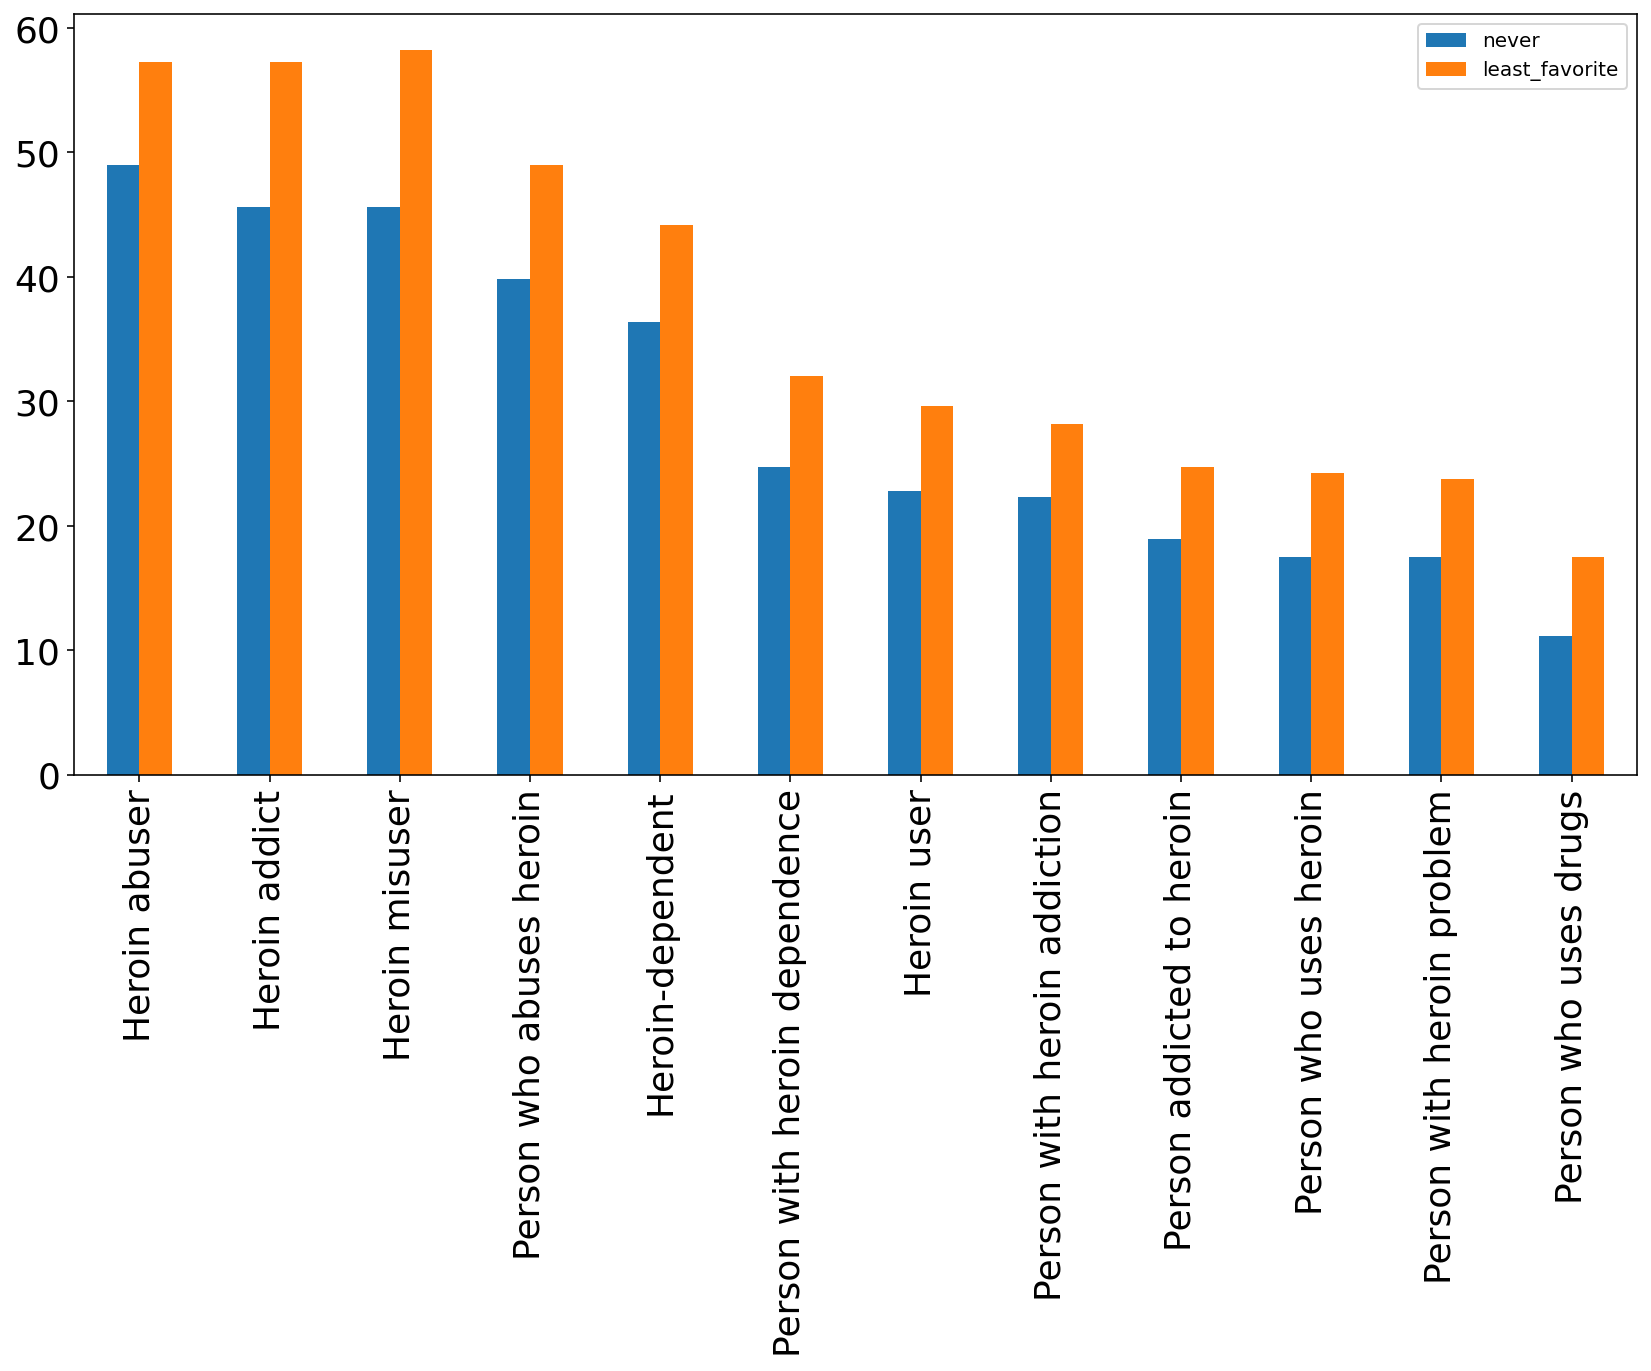

In [286]:
never_and_least_favorite.plot(kind='bar', figsize=(14, 7), fontsize=18);

In [287]:
prefer_and_favorite = (
    pd.merge(prefer, favorite, left_index=True,right_index=True,)
    .sort_values('prefer', ascending=False)
    .applymap(convert_to_percentage)
)
prefer_and_favorite

,prefer,favorite
Person who uses drugs,48.54,65.05
Person with heroin problem,39.81,53.40
Person who uses heroin,37.38,49.03
Person addicted to heroin,35.92,49.51
Person with heroin addiction,34.47,46.60
Heroin user,28.64,37.38
Person with heroin dependence,28.64,39.81
Heroin-dependent,16.99,21.84
Person who abuses heroin,16.50,24.76
Heroin addict,14.56,19.42


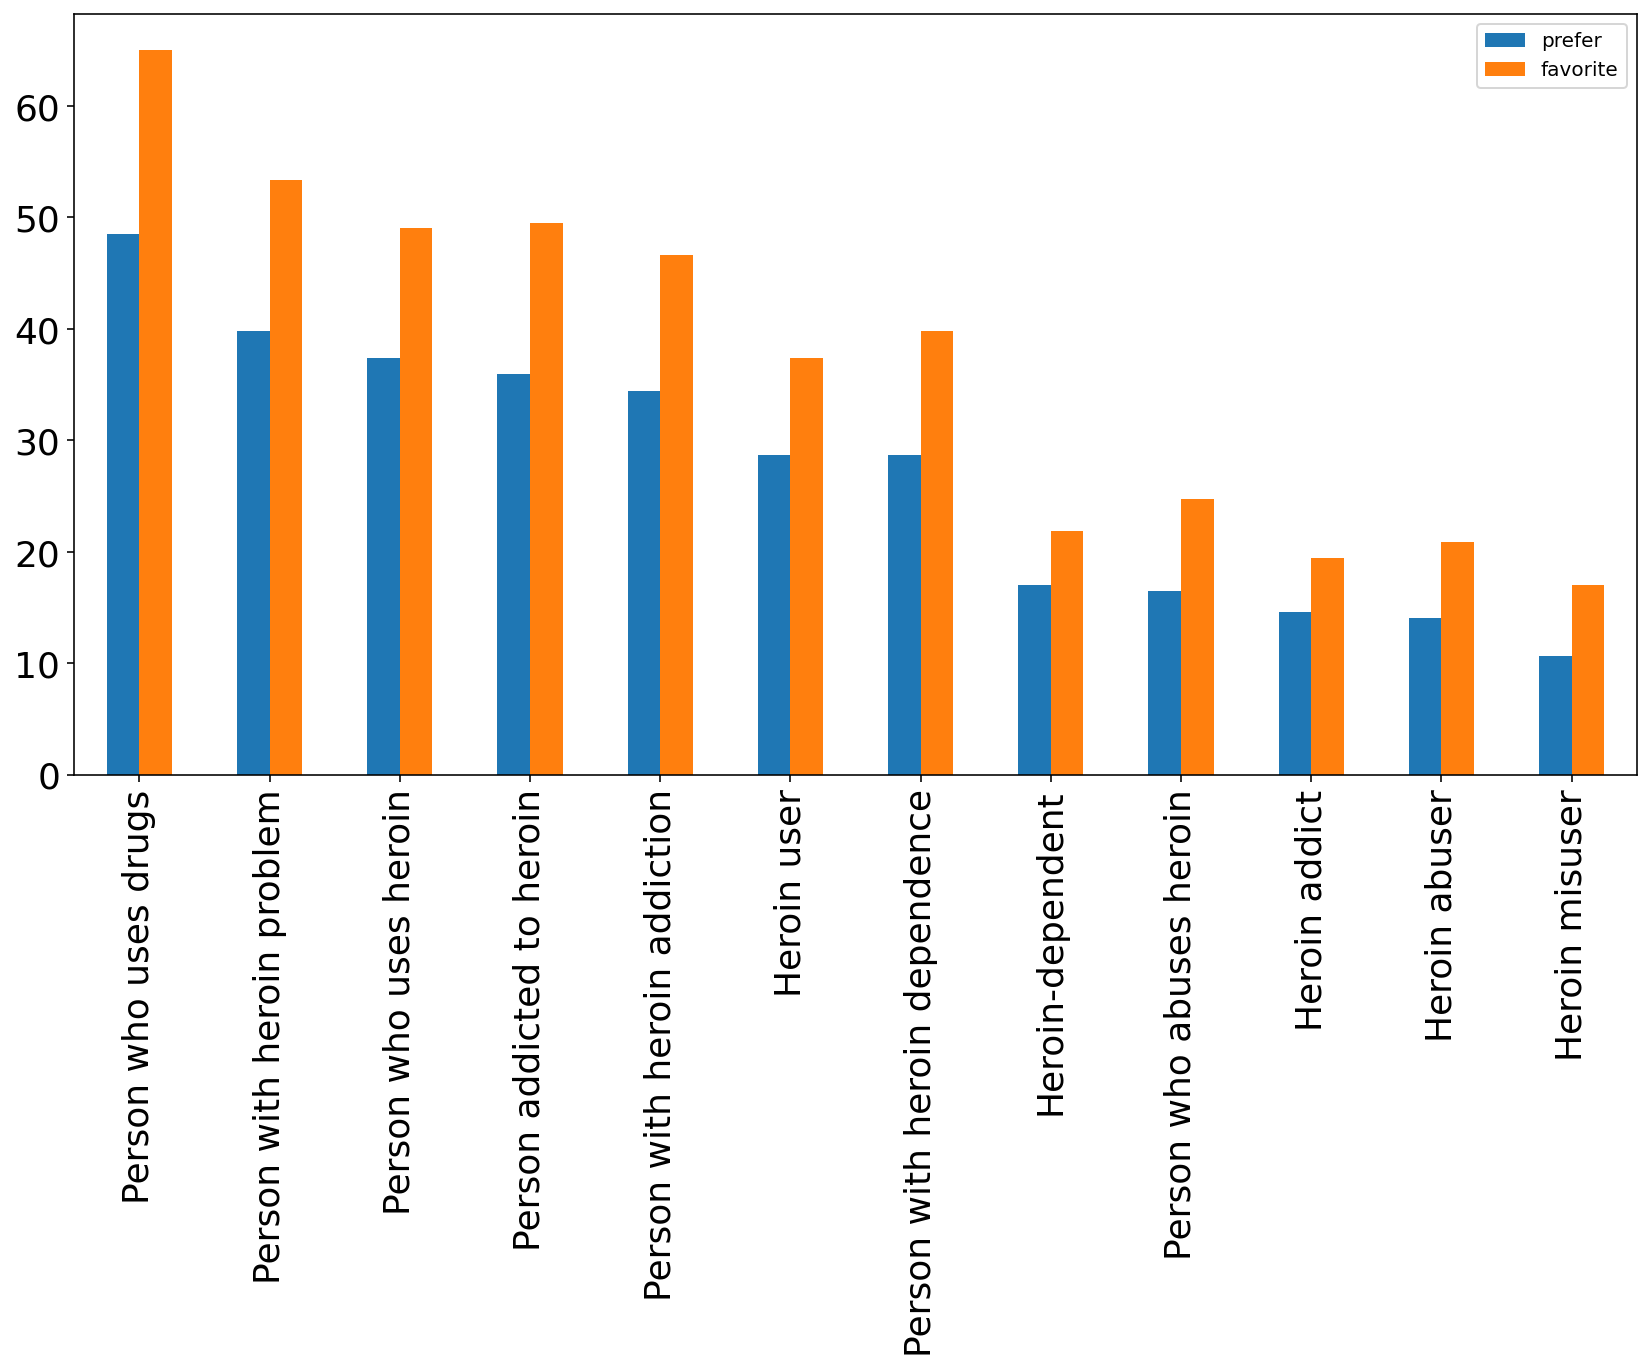

In [303]:
prefer_and_favorite.plot(kind='bar', figsize=(14, 7), fontsize=18);

Treating the ordinal Likert scales as a numerical seems even more problematic, 
but since some may wish to see this, we can humor them...

(Should we also go all the way to adding the standard deviation of the mean (those +/- 2.26) even though 
other distortions such as sample bias and the Likert scale itself probably overshadow those due to estimating a 
population mean with a sample mean? 
I say: Let's not encourage thoughtless quantitative methodology dogma further!)

In [482]:
mean_score = d.mean().apply(lambda x: round(x, 2))
mean_score.name = 'mean'
mean_score

Heroin addict                    3.08
Heroin-dependent                 3.53
Heroin abuser                    2.96
Heroin misuser                   2.88
Heroin user                      4.40
Person with heroin addiction     4.63
Person with heroin dependence    4.37
Person who abuses heroin         3.27
Person who uses heroin           4.81
Person addicted to heroin        4.67
Person with heroin problem       4.87
Person who uses drugs            5.30
Name: mean, dtype: float64

In [483]:
median_score = d.median()
median_score.name = 'median'
median_score

Heroin addict                    2.5
Heroin-dependent                 4.0
Heroin abuser                    2.0
Heroin misuser                   2.0
Heroin user                      5.0
Person with heroin addiction     5.0
Person with heroin dependence    5.0
Person who abuses heroin         3.0
Person who uses heroin           6.0
Person addicted to heroin        5.0
Person with heroin problem       6.0
Person who uses drugs            6.0
Name: median, dtype: float64

In [487]:
pd.concat([
    never.apply(convert_to_percentage), 
    prefer.apply(convert_to_percentage), 
    mean_score, 
    median_score
], axis=1)

,never,prefer,mean,median
Heroin addict,45.6,14.6,3.08,2.5
Heroin-dependent,36.4,17.0,3.53,4.0
Heroin abuser,49.0,14.1,2.96,2.0
Heroin misuser,45.6,10.7,2.88,2.0
Heroin user,22.8,28.6,4.40,5.0
Person with heroin addiction,22.3,34.5,4.63,5.0
Person with heroin dependence,24.8,28.6,4.37,5.0
Person who abuses heroin,39.8,16.5,3.27,3.0
Person who uses heroin,17.5,37.4,4.81,6.0
Person addicted to heroin,18.9,35.9,4.67,5.0


### Labels word clouds

What weight should we use to represent the importance of a label? 

Since taking Likert scale values as numerical whose mean and median have some kind of interpretable 
meaning doesn't seem to be a problem for some, we'll be lazy and do the same here, 
summing the scores of the labels to get a weight for each label. 

Obviously, a more careful analysis could be done, but what's the use of over-thinking 
a solution when the bulk of the audience doesn't recognize the very problem!

In [331]:
from collections import defaultdict

def iter_label_and_scores(d):
    for column_name, column_vals in d.items():
        for score in column_vals:
            yield column_name, score
            
def labels_aggregate_score(d):
    stats = defaultdict(int)
    for label, score in iter_label_and_scores(d):
        if isinstance(score, int):
            stats[label] += score
    return pd.Series(stats).sort_values(ascending=False)

labels_aggregate_score(d)

Person who uses heroin           990
Person addicted to heroin        961
Person with heroin addiction     954
Heroin user                      906
Person with heroin dependence    901
Heroin addict                    634
Heroin abuser                    609
dtype: int64

Note that there's overwhelming evidence that people prefer expressions containing the word "person".
Secondarily, there's a preference for the more neutral "who uses" or "user" 
over the more negative "addict(ed)(ion)", "dependence" or "abuser". 

In [344]:
from collections.abc import Mapping


False

In [347]:
word_cloud(labels_aggregate_score(d), 'in_their_words_labels.pdf')

## background characteristics

In [304]:
data.columns

Index(['SID', 'Q1', 'Q14', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q3_1',
       'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q3_9', 'Q3_10',
       'Q3_11', 'Q3_12', 'Q3_13', 'Q3_13_TEXT', 'Q4', 'Q5', 'Q5_3_TEXT', 'Q6',
       'Q6_6_TEXT', 'Q7', 'Q8', 'Education Number', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q15', 'Education Number.1'],
      dtype='object')

In [305]:
characteristics_cols = [
    'Q7', 'Q8', 'Education Number', 'Q9', 'Q10', 'Q11', 'Q12','Q15', 'Education Number.1'
]
data[characteristics_cols]

,Q7,Q8,Education Number,Q9,Q10,Q11,Q12,Q15,Education Number.1
1,Hispanic/Latinx,14,14,More than High School Diploma/GED,substance abuser,dislikes the dual lifestyle; whether work coll...,There is judgment based on the type of drug su...,Bi-racial,14
2,Hispanic/Latinx,12,12,High school,"addict - the term ""user/using"" is stupid; isn'...",not really affected,addiction isn't pretty; it's angry and terms l...,Bi-racial,12
3,Not Hispanic/Latinx,14,14,More than High School Diploma/GED,user junkie: I go back and forth between user ...,it hasn't really;,"""addiction"" term is often misused",White,14
4,Not Hispanic/Latinx,14,14,More than High School Diploma/GED,"addict, user, Junkie: regardless of another's ...",not sure they have,doesn't really talk to 12-steppers,NaN,14
5,Not Hispanic/Latinx,14,14,More than High School Diploma/GED,situational user: self-loathing,no,NaN,White,14
...,...,...,...,...,...,...,...,...,...
202,Not Hispanic/Latinx,12,12,High school,Addict - It's the respectful way to let people...,Not noticed a chane because I don't really go ...,NaN,White,12
203,Not Hispanic/Latinx,12 - GED,12,High school,Addict - Is an acceptable for society. It is o...,They treat you differently as soon as they hea...,NaN,White,12
204,Not Hispanic/Latinx,12,12,High school,Abuser - I know that I shouldn't be doing this...,Does still call me an addict. I don't like it....,Education - GED,Black/African American,12
205,Not Hispanic/Latinx,13,13,More than High School Diploma/GED,Addict - I am addicted to things. It really de...,They are more compassionate now and they are m...,Education - some college,Black/African American,13


In [491]:
background_stats = dict()
for c in characteristics_cols:
    if 'Education Number' in c:
        t = [int(x) if isinstance(x, str) else x for x in data[c]]
        background_stats[c] = pd.Series(Counter(t)).sort_values(ascending=False)
    else:
        background_stats[c] = pd.Series(Counter(data[c])).sort_values(ascending=False)
    

In [492]:
background_stats['Q7']

Not Hispanic/Latinx    172
Hispanic/Latinx         34
dtype: int64

In [493]:
background_stats['Q9']

High school                          81
More than High School Diploma/GED    71
Less than High school Diploma/GED    53
high school                           1
dtype: int64

In [494]:
background_stats['Q15']

Black/African American    96
White                     65
Latino/a Hispanic         25
Bi-racial                 11
Native American            7
NaN                        2
dtype: int64

In [495]:
background_stats['Education Number']

12.0    79
14.0    32
13.0    21
11.0    19
10.0    14
16.0    10
9.0      6
8.0      6
7.0      5
15.0     4
NaN      3
20.0     2
24.0     1
17.0     1
3.0      1
18.0     1
4.0      1
dtype: int64

In [498]:
np.nanmean([int(x) if isinstance(x, str) else x for x in data['Education Number']])

12.22167487684729

### Messy Categories 

These categories need more work

In [309]:
background_stats['Q8']

12                                               68
14                                               24
11                                               18
10                                               14
13                                               10
16                                                9
NaN                                               7
9                                                 6
8                                                 5
7                                                 4
15                                                2
13 (1 year of college)                            2
12 - GED                                          2
20                                                2
12 + trade school                                 1
14 (Sociology in college for 2.5 years)           1
11th                                              1
14 - Associate's degree aerospace engineering     1
14.5, 2.5 years of college- criminal jusice       1
12          

In [318]:
background_stats['Q10']

addict I am addicted                                                                                                                                                                                                    2
substance abuser                                                                                                                                                                                                        1
My preferred is nothing, just my name. I'm not trying to be labled. Participant ultimately chose user. (Preference for the label user decreased when talking to family). 10. I just liked to  be called by my name.     1
Fiend (Q2 - others who use drugs "I don't label myself"; drug counselors through 12-step "Addict") - I feel like I am a fiend when I want to get high I act like an asshole until I get it.                             1
Addict - I feel comfortable because I am an addict. There is no other way to put it. This is the proper term.                   

# Sentiment analysis

In [84]:
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('en-sentiment')

def _sentiment_score_object(string):
    sentence = Sentence(string)
    sia.predict(sentence)
    return sentence.labels[0]

def sentiment_score(string):
    score = _sentiment_score_object(string)
    if score.value == 'NEGATIVE':
        return -score.score
    elif score.value == 'POSITIVE':
        return score.score
    else:
        raise ValueError(f"Didn't know score.value could be {score.value}")

def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
    

2021-11-30 08:29:18,007 loading file /Users/Thor.Whalen/.flair/models/sentiment-en-mix-distillbert_4.pt


In [36]:
sentence = Sentence(x)
sia.predict(sentence)
score = sentence.labels[0]
t = sentence.labels[0]
score.value, score.score

('NEGATIVE', 0.9968258142471313)

In [86]:
unik_term_cats = set(term_category) - {'other'}
for x in unik_term_cats:
    print(f"{x}: ({100 * sentiment_score(x):.02f})")

addict: (-99.68)
user: (82.05)
slang: (-99.70)


In [87]:
unik_term_cats = set(term_category) - {'other'}
for x in labels:
    print(f"{x}: ({100 * sentiment_score(x):.02f})")

Heroin addict: (-99.75)
Heroin-dependent: (-99.70)
Heroin abuser: (-98.96)
Heroin misuser: (-99.97)
Heroin user: (-99.21)
Person with heroin addiction: (-95.73)
Person with heroin dependence: (-99.29)
Person who abuses heroin: (-95.79)
Person who uses heroin: (-98.64)
Person addicted to heroin: (-99.06)
Person with heroin problem: (-95.34)
Person who uses drugs: (-54.39)


In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Thor.Whalen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
vader = SentimentIntensityAnalyzer()

x = 'addict'
vader.polarity_scores(x)

# df["sentiment_score"] = df["reviews.text"].apply(lambda x: vader.polarity_scores(x)["compound"])
# df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
#                            ['neg', 'neu', 'pos'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

# Scrap

## Some stats

In [70]:
def counts_and_percentage_tables(d):
    n = len(d)
    t = pd.Series(Counter(d)).sort_values(ascending=False)
    return t, t / n

In [76]:
n

206

In [117]:
counts, perc = counts_and_percentage_tables(data['Q6'])
counts

Black/African American    101
White                      83
Other                      10
Native American             7
Bi-racial                   5
dtype: int64

In [72]:
perc

Black/African American    0.490291
White                     0.402913
Other                     0.048544
Native American           0.033981
Bi-racial                 0.024272
dtype: float64

In [77]:
counts, perc = counts_and_percentage_tables(data['Q7'])
counts

Not Hispanic/Latinx    172
Hispanic/Latinx         34
dtype: int64

In [78]:
perc

Not Hispanic/Latinx    0.834951
Hispanic/Latinx        0.165049
dtype: float64

In [115]:
d = data['Q4'].dropna().astype(int)
np.mean(d), np.std(d), np.median(d),  (np.min(d), np.max(d))

(47.63414634146341, 11.696478722896458, 49.0, (18, 71))

In [116]:
d = data['Education Number'].dropna().astype(int)
np.mean(d), np.std(d), np.median(d),  (np.min(d), np.max(d))

(12.22167487684729, 2.3935716768309736, 12.0, (3, 24))

In [119]:
data['Q3_1'], data['Q3_13']

(1      3
 2      2
 3      7
 4      4
 5      1
       ..
 202    1
 203    1
 204    1
 205    3
 206    3
 Name: Q3_1, Length: 206, dtype: object,
 1        7
 2      NaN
 3        7
 4        4
 5        1
       ... 
 202    NaN
 203      1
 204    NaN
 205    NaN
 206    NaN
 Name: Q3_13, Length: 206, dtype: object)